# Dataset *heart_failure_clinical_records_dataset*

# *Data Dimensionality*

- **How many variables are there in the dataset?**<br>
A: 13 variables (age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT;


- **And how many records?**<br>
A: 299 records;


- **What is the ratio between the number of records and variables?**<br>
A: 299/13 = 23. 23 record for variable.


- **What are the types for each variable?**<br>
float64 : age <br>
int64 : anaemia <br>
int64 : creatinine_phosphokinase <br>
int64 : diabetes <br>
int64 : ejection_fraction <br>
int64 : high_blood_pressure <br>
float64 : platelets <br>
float64 : serum_creatinine <br>
int64 : serum_sodium <br>
int64 : sex <br>
int64 : smoking <br>
int64 : time <br>
int64 : DEATH_EVENT <br>


- **How many missing values are there per variable?**<br>
A:0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ds_functions as ds
import scipy.stats as _stats
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
data = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv', parse_dates=True, infer_datetime_format=True)
data.shape

(299, 13)

## Nr of records vs nr variable

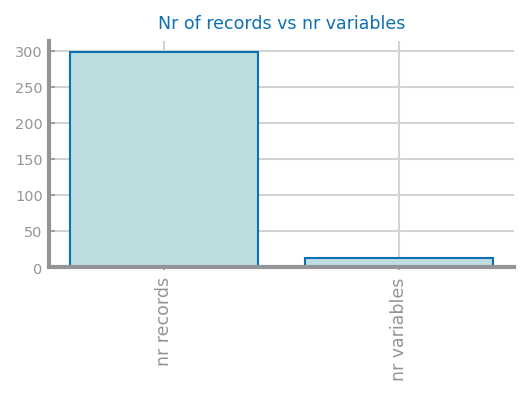

In [2]:
plt.figure(figsize=(4,2))
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr variables')

## Data Types

In [3]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

## Missing values 

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

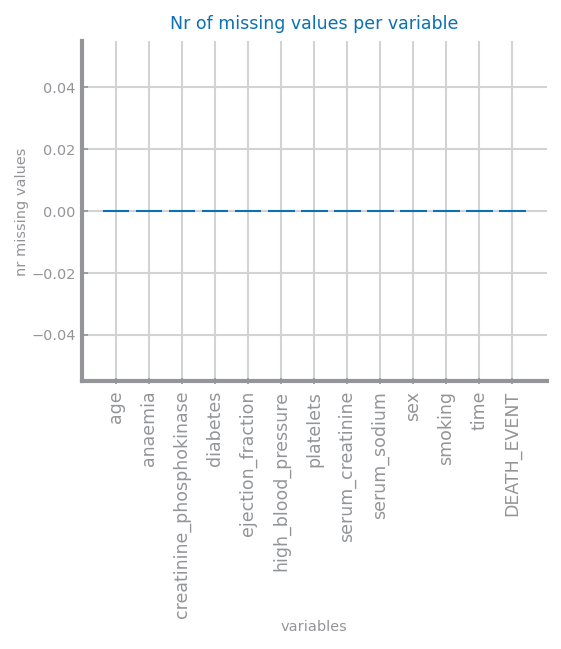

In [4]:
plt.figure()
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()
ds.bar_chart(mv.keys(), mv.values(), title='Nr of missing values per variable',
               xlabel='variables',
               ylabel='nr missing values')
mv.values()

# *Data Distribution*

In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Boxplots all numeric variables

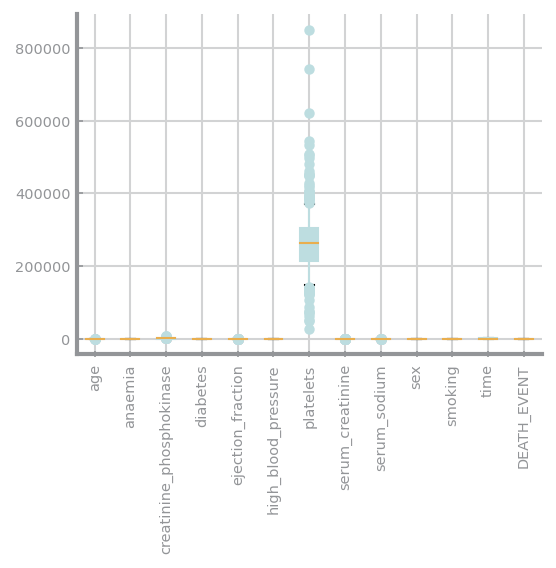

In [6]:
data.boxplot(rot=90)
plt.show()

## Boxplots for each variables

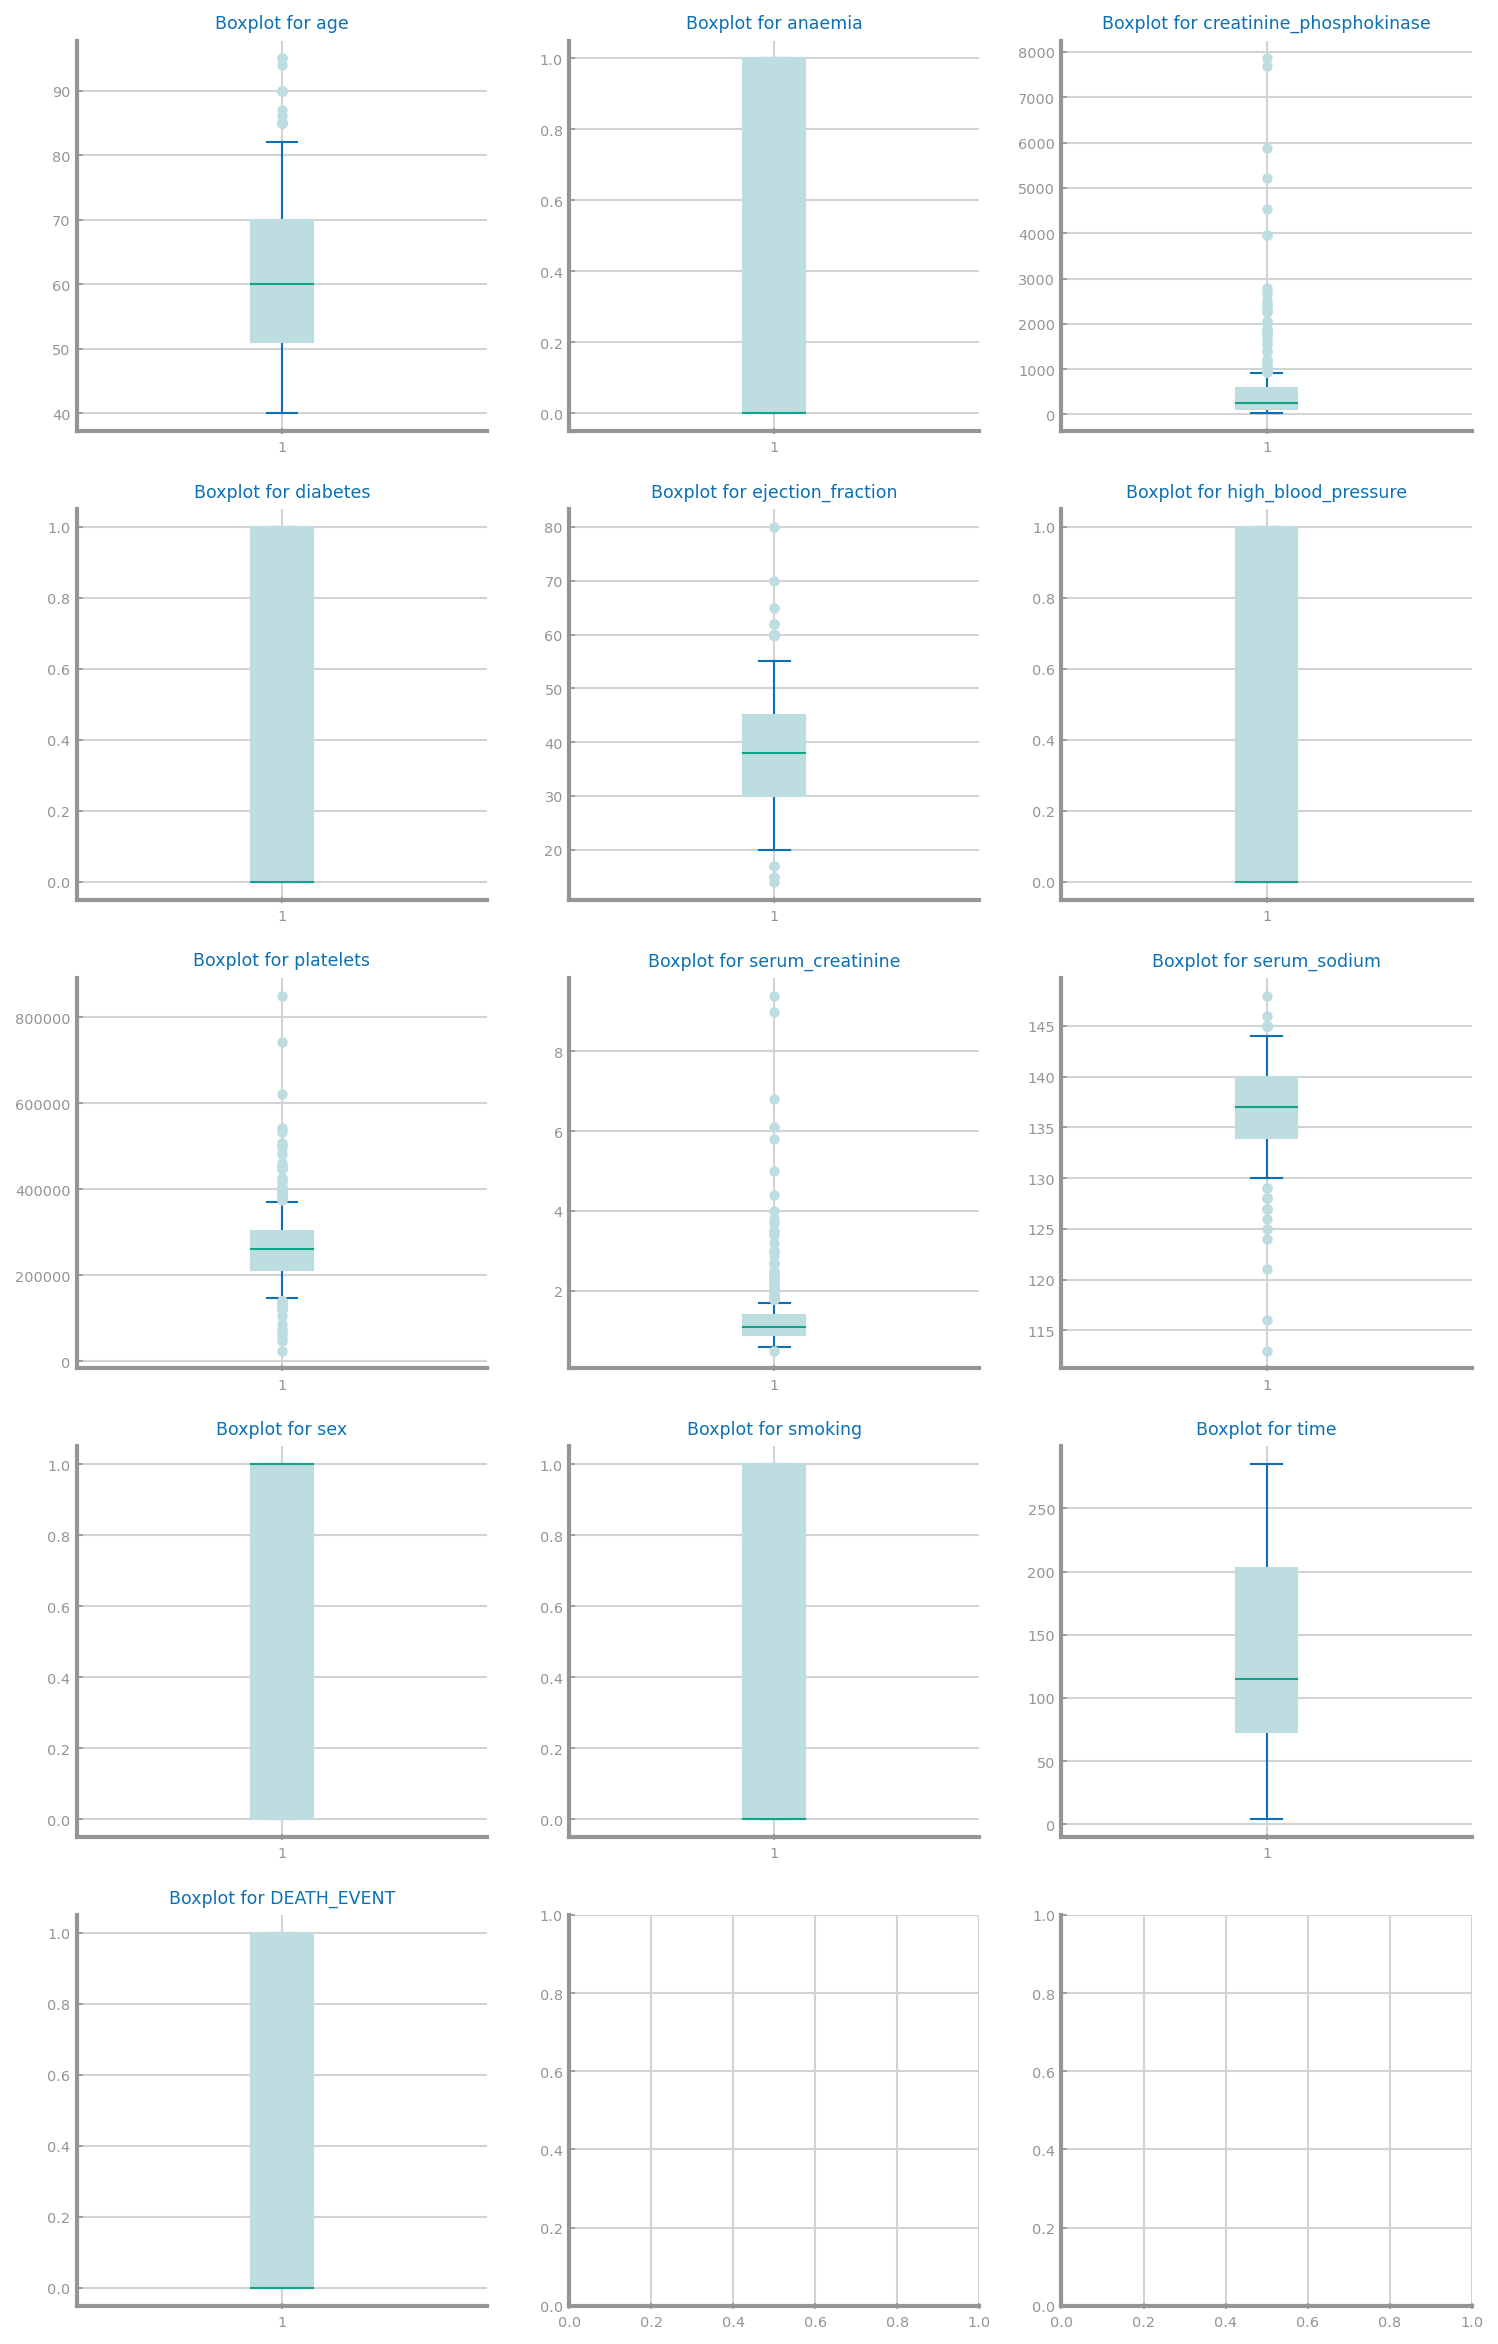

In [7]:
numeric_vars = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(len(numeric_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

## histogram for each numeric variable (variables distribution)

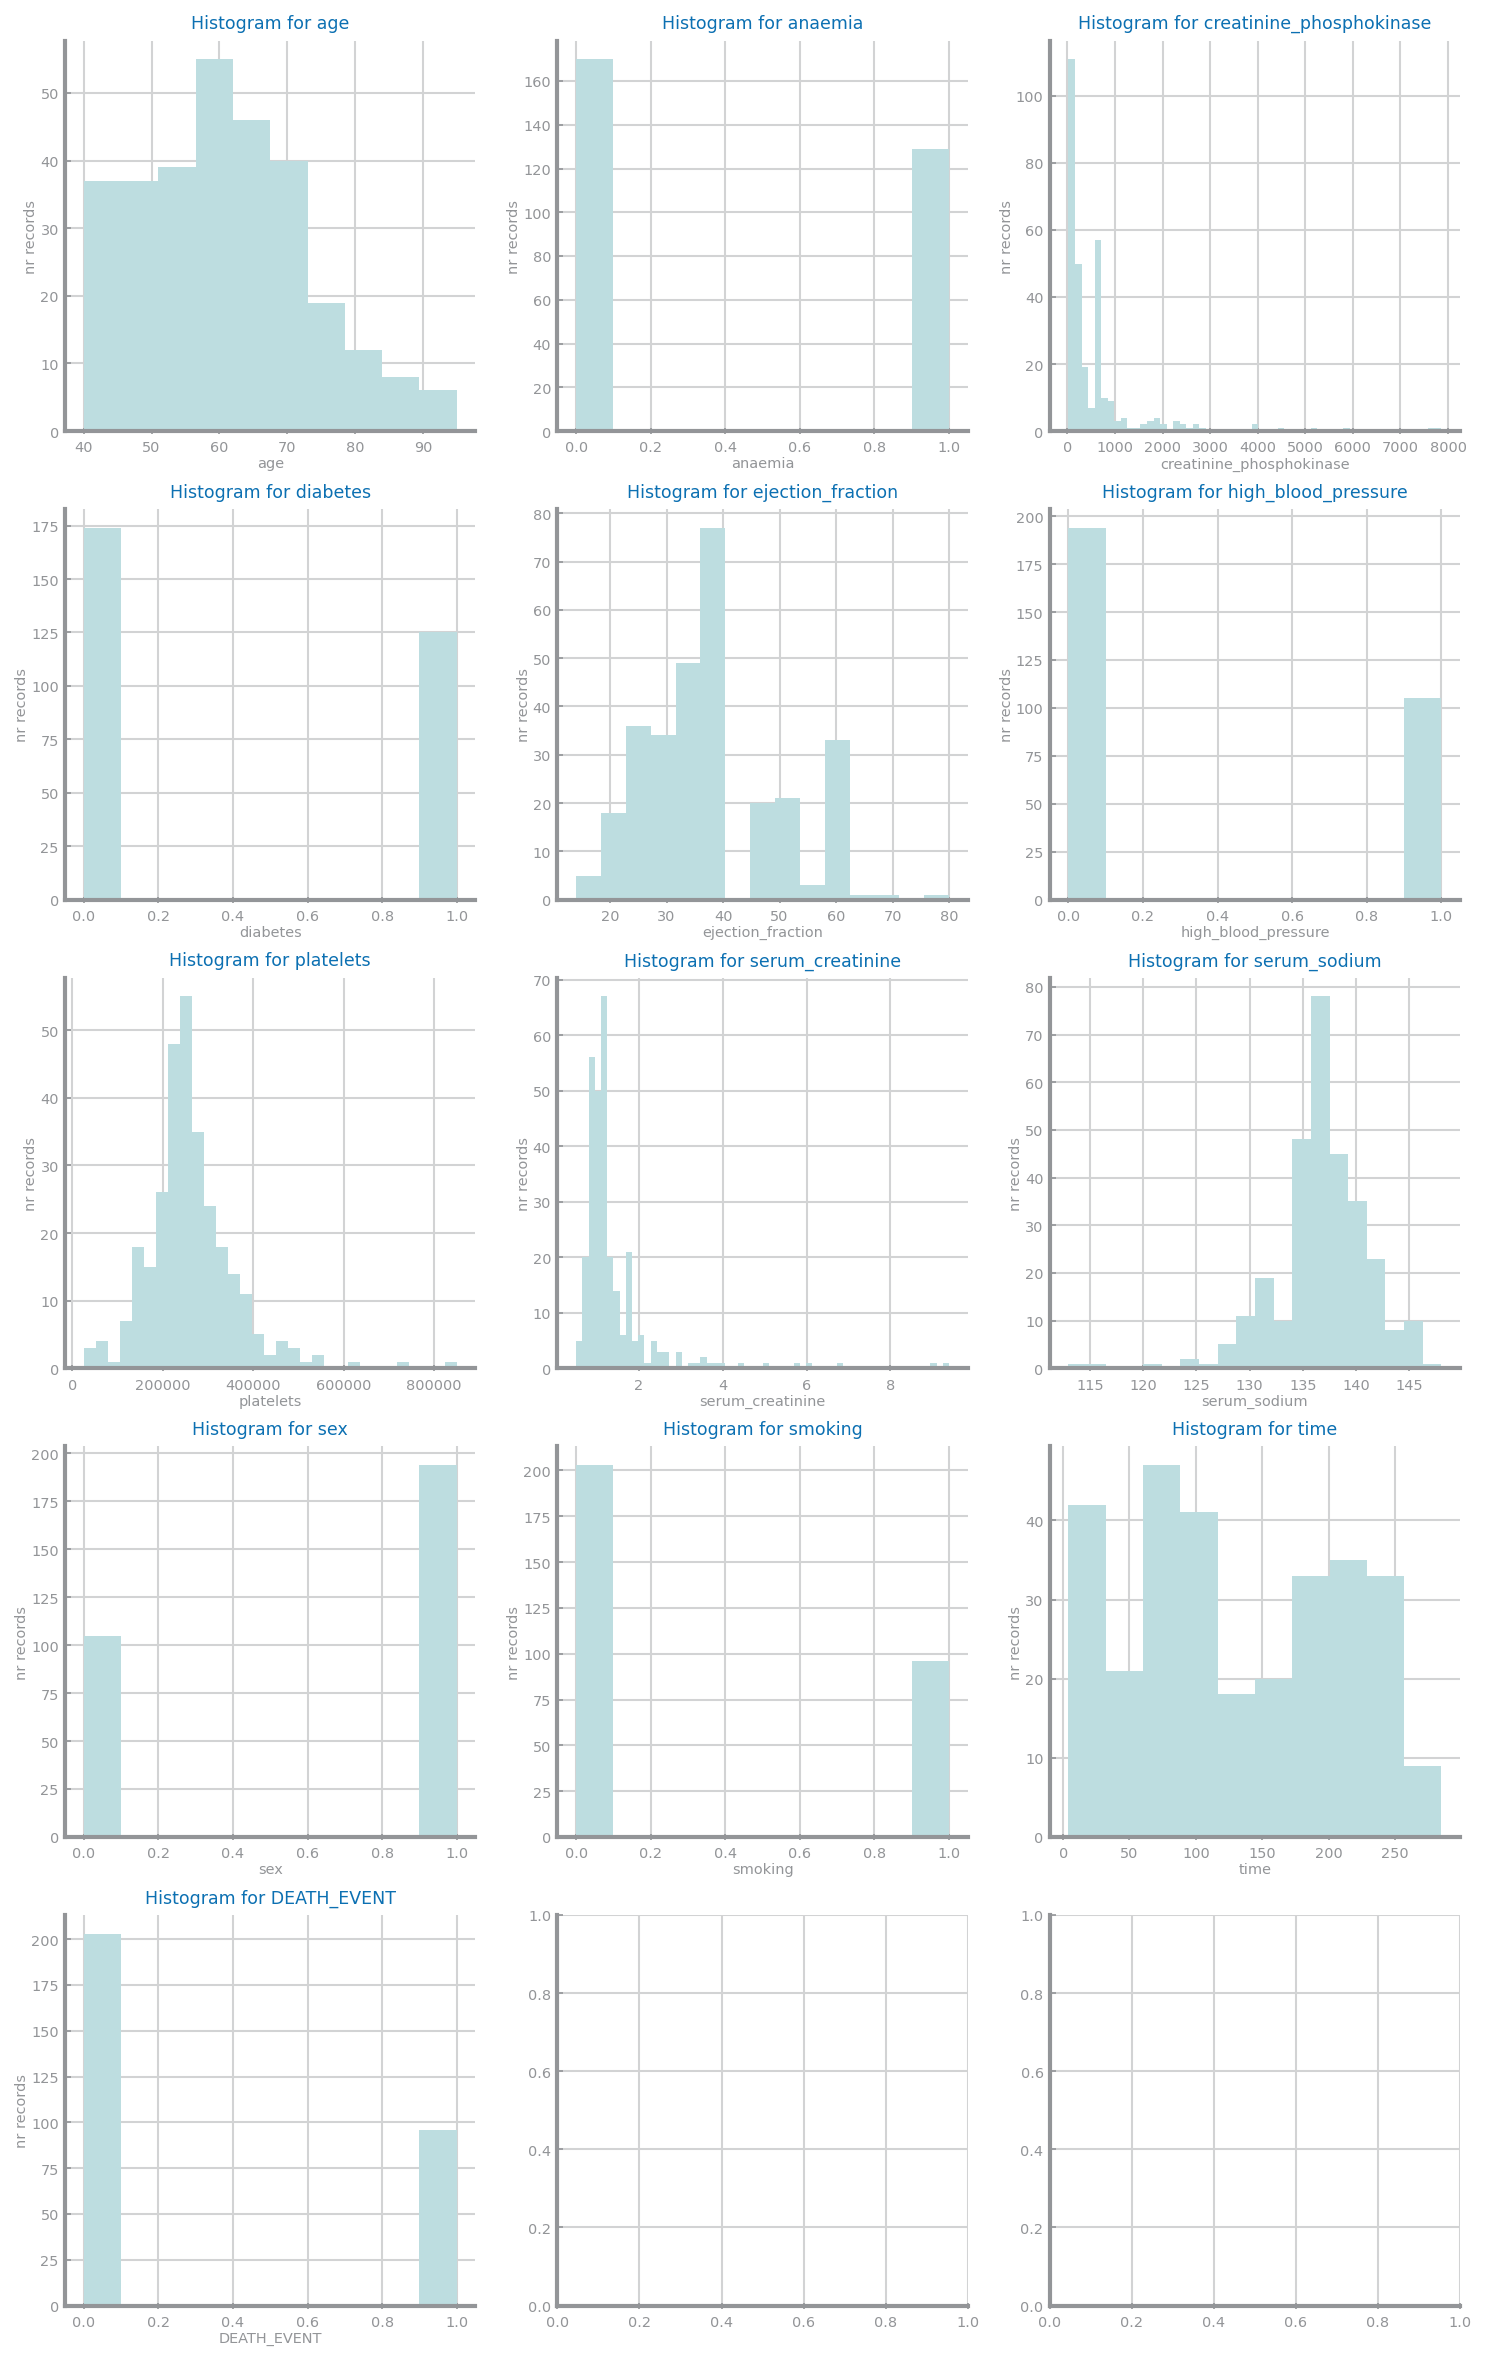

In [8]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram for %s'%numeric_vars[n])
    axs[i, j].set_xlabel(numeric_vars[n])
    axs[i, j].set_ylabel("nr records")
    axs[i, j].hist(data[numeric_vars[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

## Best fit for the each variable

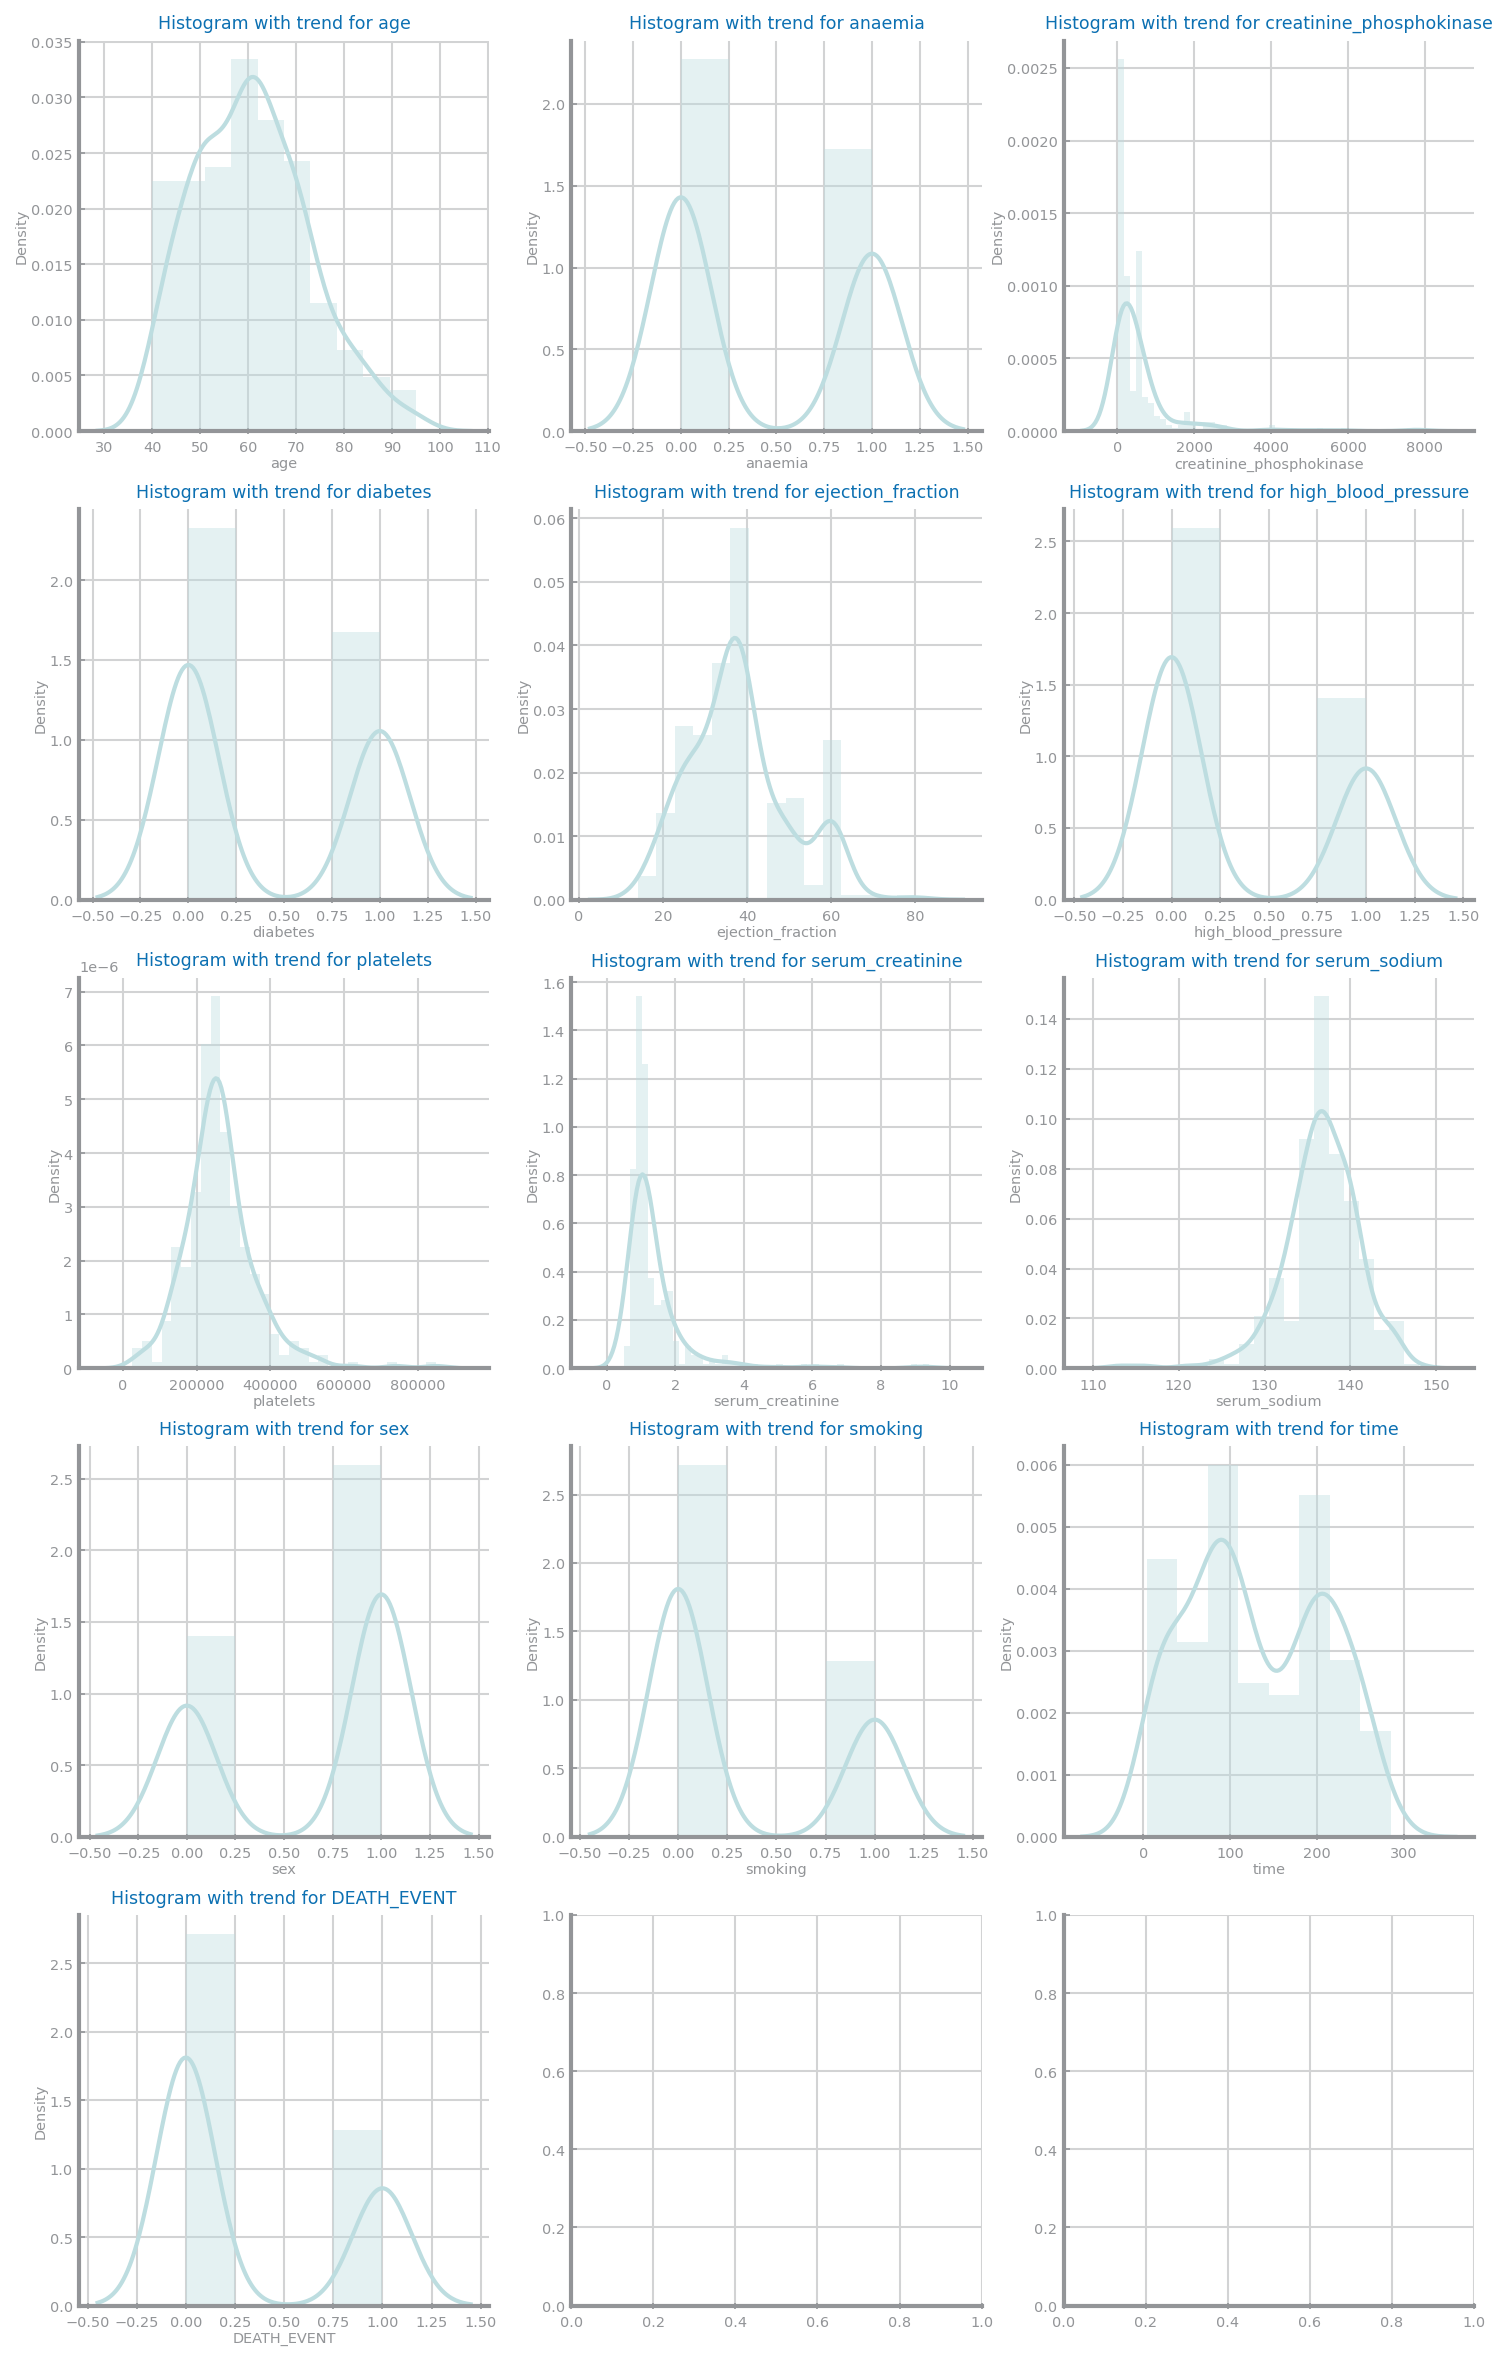

In [9]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram with trend for %s'%numeric_vars[n])
    sns.distplot(data[numeric_vars[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=numeric_vars[n])
    i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
plt.show()

In [10]:
def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = _stats.lognorm.fit(x_values)
    distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    ax.hist(values, 40, density=True)
    distributions = compute_known_distributions(values)
    ds.multiple_line_chart(values, distributions, ax=ax, title='Best fit for %s'%var, xlabel=var, ylabel='', hidegrid=True)

## Distributions For Each Sampled Numeric Variable

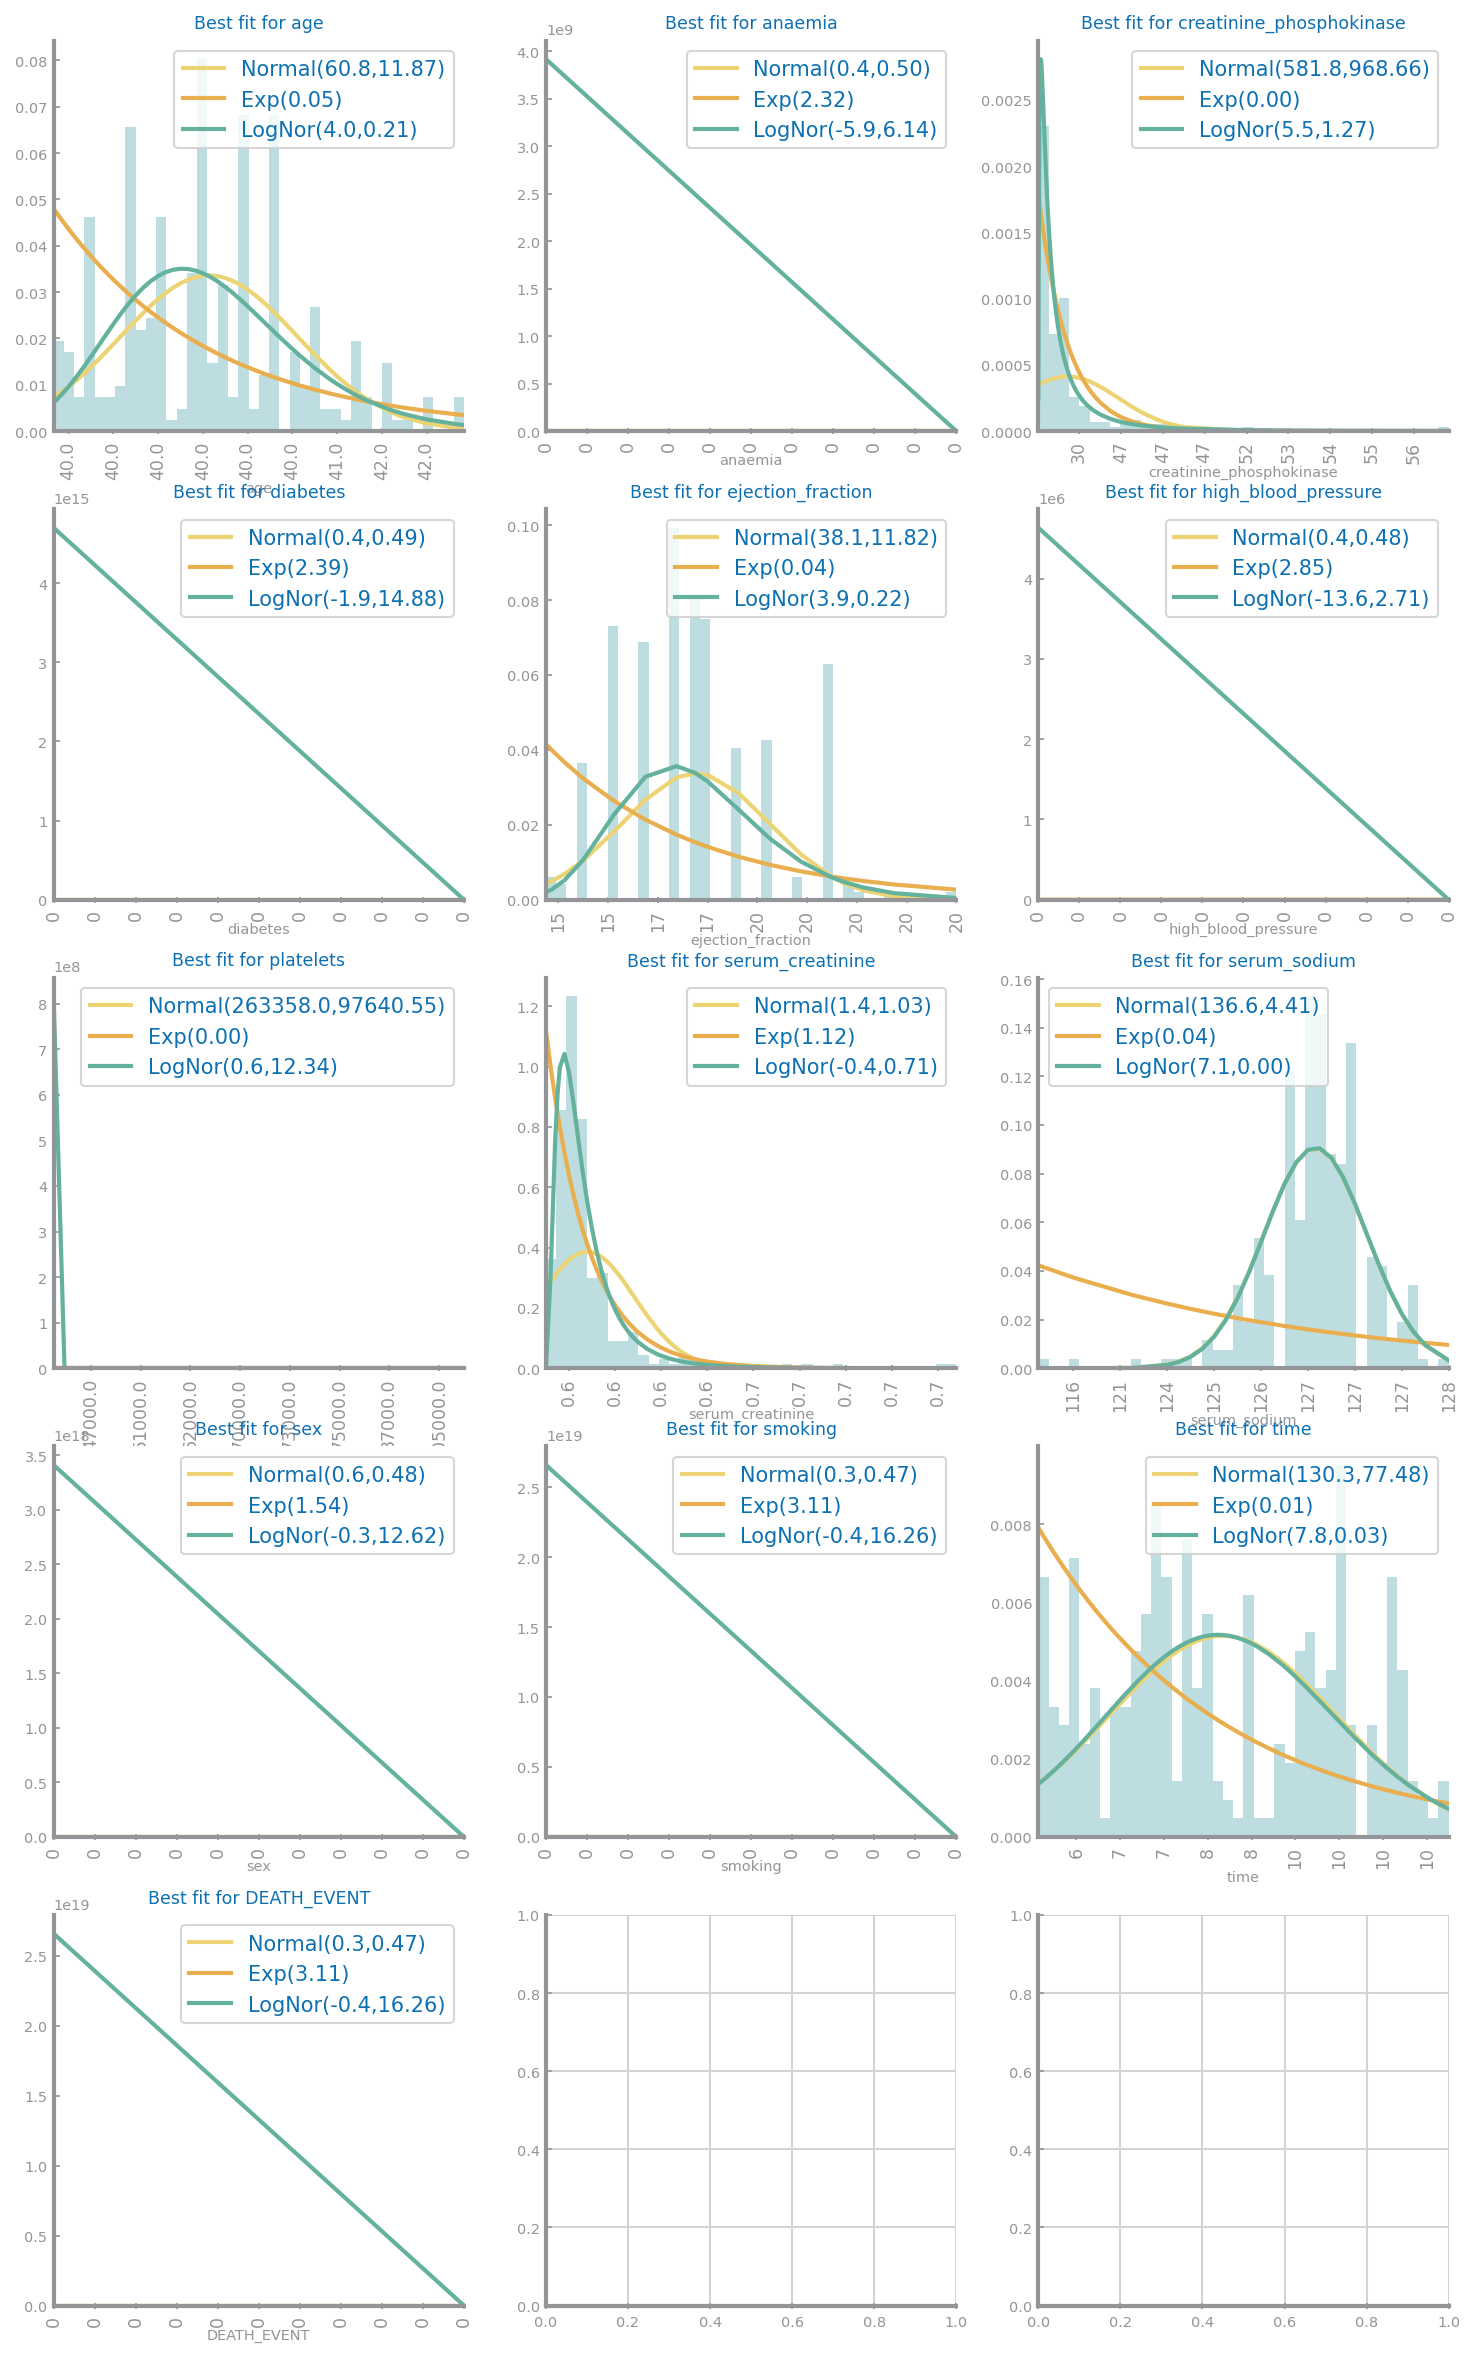

In [11]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    histogram_with_distributions(axs[i, j], data[numeric_vars[n]].dropna(), numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()


## Description of SymbolicsVariable (Target Variable)

In [12]:
data.dropna().describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# *Granularity*

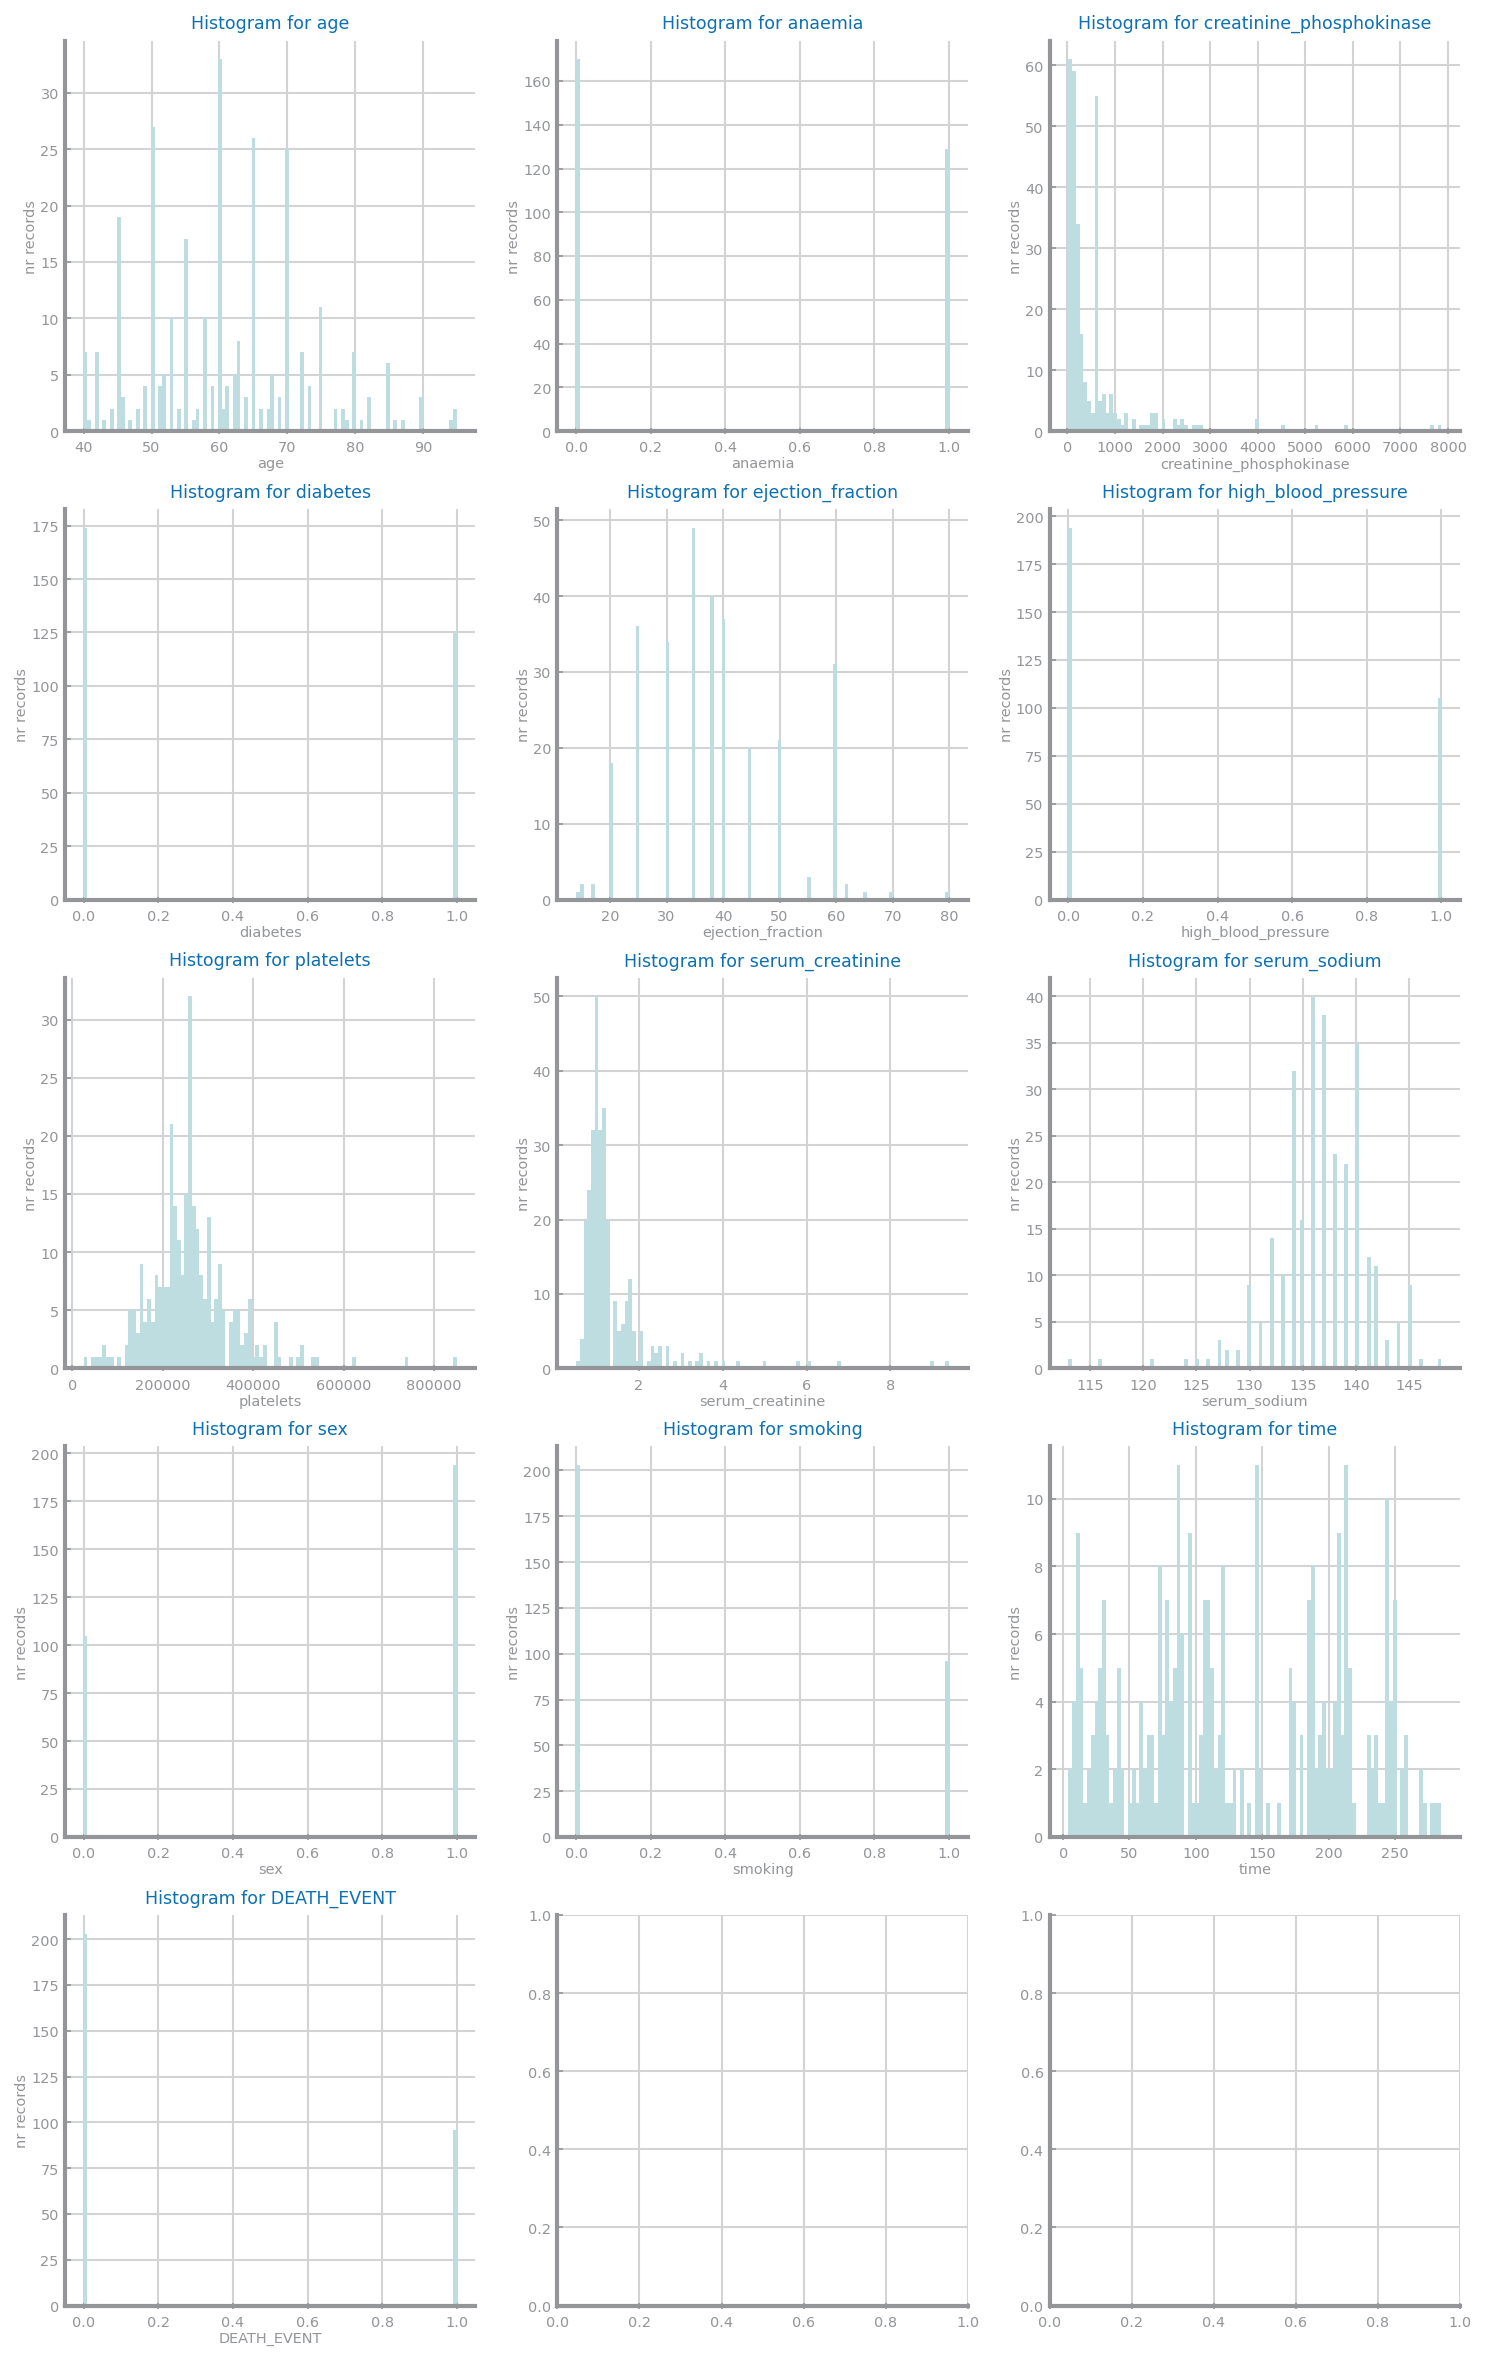

In [13]:
variables = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(len(variables))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%variables[n])
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data[variables[n]].values, bins=100)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

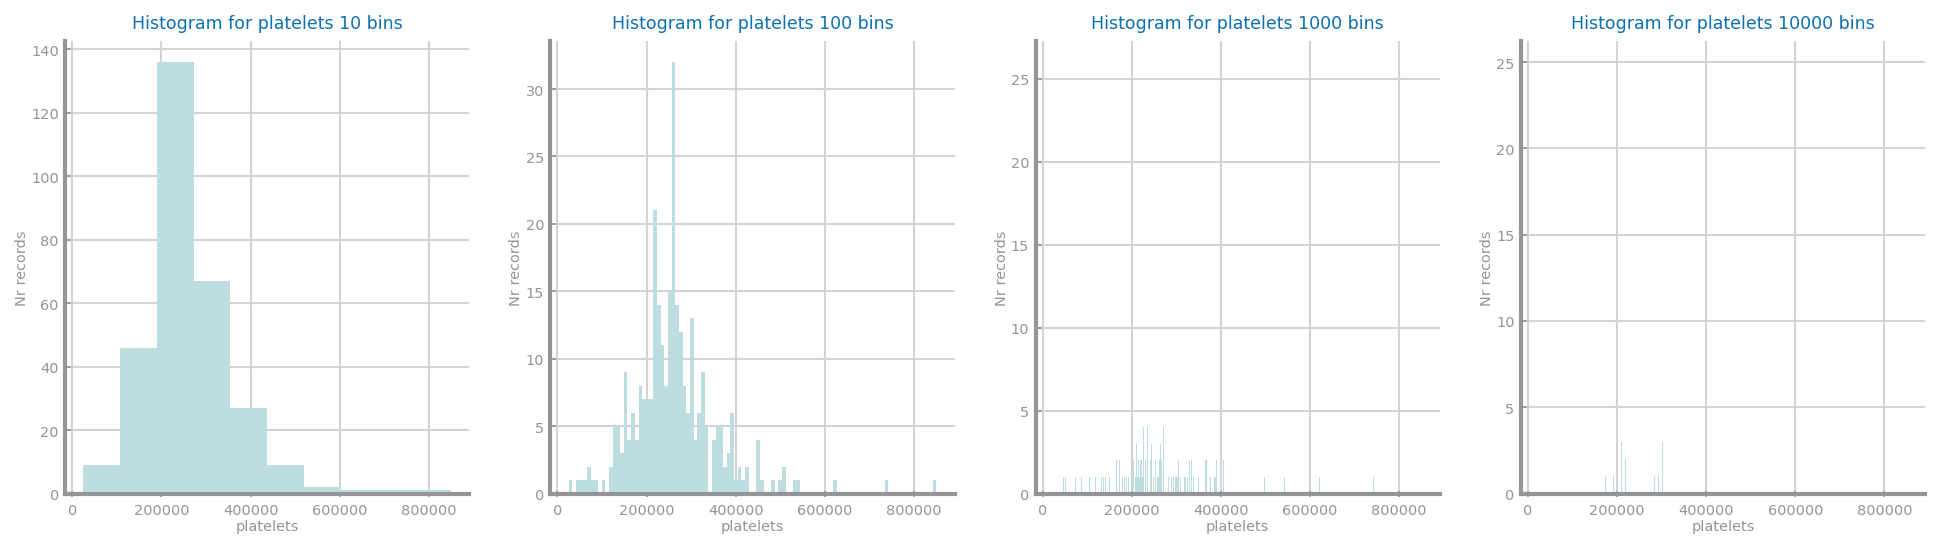

In [14]:
bins = (10, 100, 1000, 10000)
fig, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ds.HEIGHT, ds.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for %s %d bins'%('platelets', bins[j]))
    axs[j].set_xlabel('platelets')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(data['platelets'].values, bins=bins[j])
plt.show()

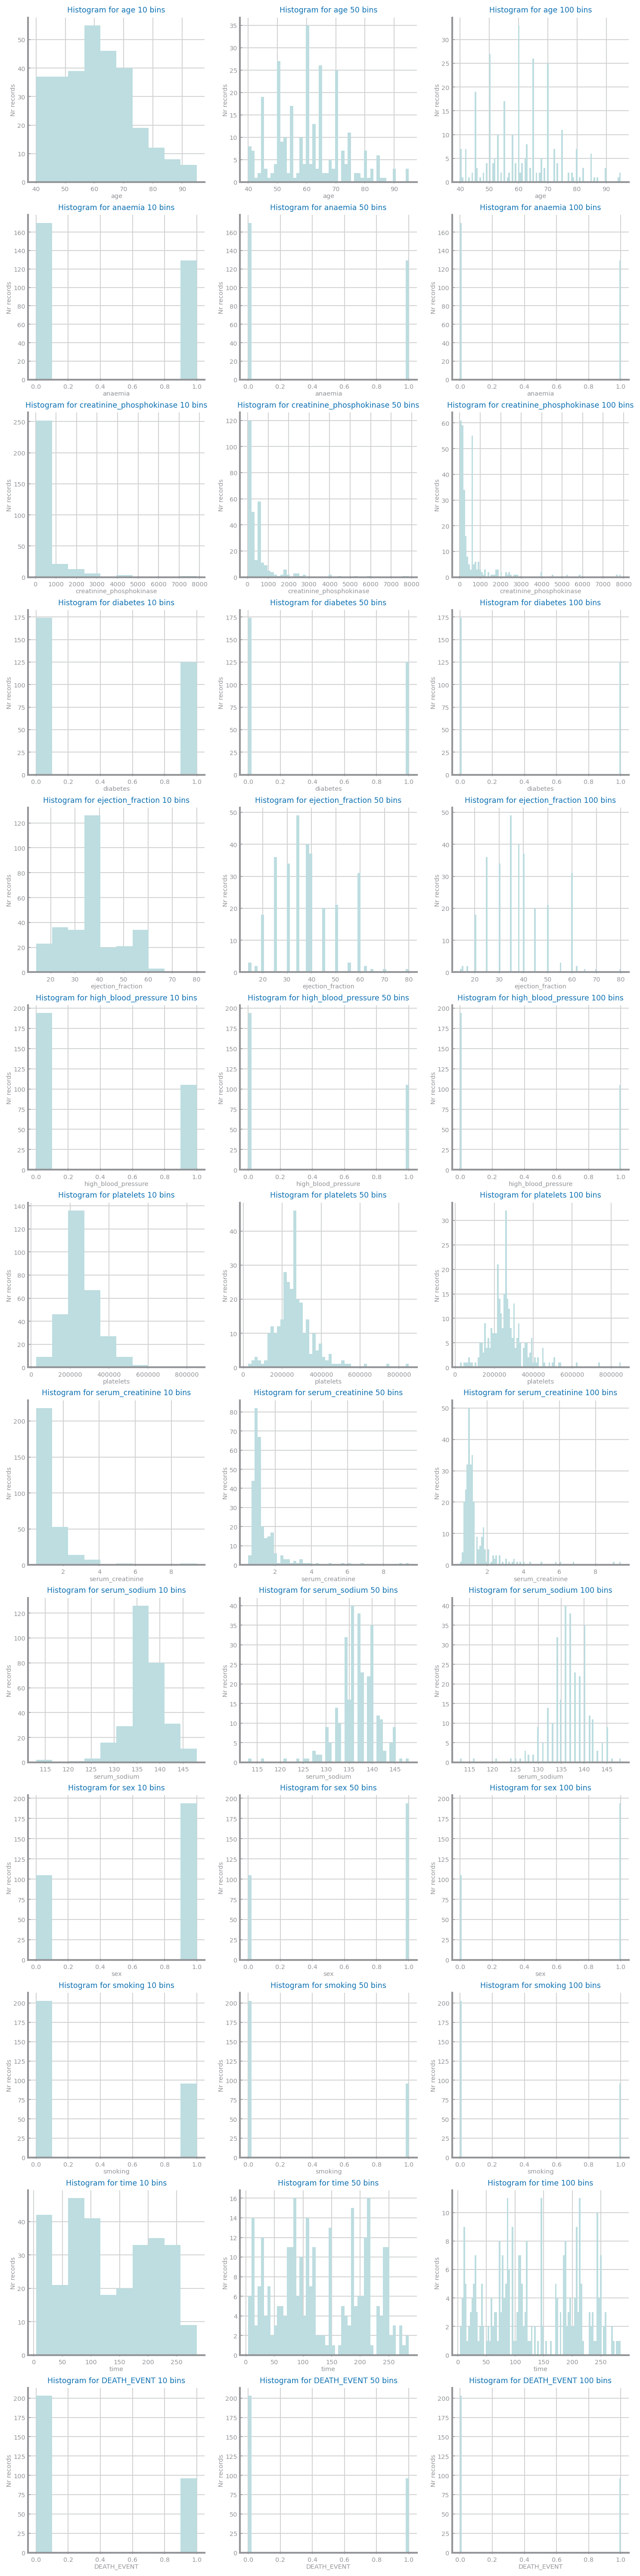

In [15]:
columns = data.select_dtypes(include='number').columns
rows = len(columns)
bins = (10, 50, 100)
cols = len(bins)
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins'%(columns[i], bins[j]))
        axs[i, j].set_xlabel(columns[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(data[columns[i]].values, bins=bins[j])
plt.show()

# Dataset *qsar_oral_toxicity*

# *Data Dimensionality*

- **How many variables are there in the dataset?**<br>
A: 1025 variables (1024 molecular fingerprints, toxicity)


- **And how many records?**<br>
A: 8992 records;


- **What is the ratio between the number of records and variables?**<br>
A: 8992/1025 = 8. 8 record for variable.


- **What are the types for each variable?**<br>
int64 : MOL_FIG1 <br>
int64 : MOL_FIG2 <br>
...<br>
int64 : MOL_FIG1023 <br>
int64 : MOL_FIG1024 <br>
object : IS_TOXIC <br>


- **How many missing values are there per variable?**<br>
A:0

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import ds_functions as ds
import scipy.stats as _stats
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
data = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv', parse_dates=True, infer_datetime_format=True)
data.shape

(8992, 1025)

## Nr of records vs Nr of variables

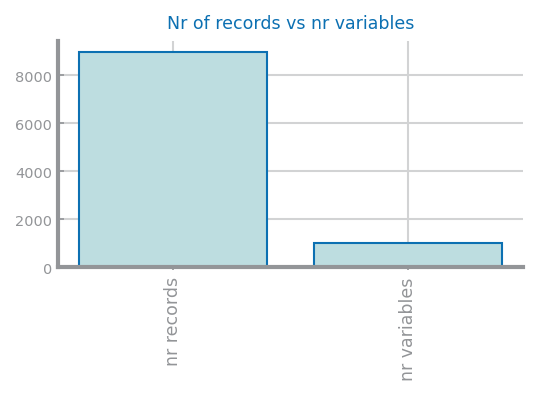

In [17]:
plt.figure(figsize=(4,2))
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr variables')

## Data Types

In [18]:
data.dtypes

MOL_FIG1        int64
MOL_FIG2        int64
MOL_FIG3        int64
MOL_FIG4        int64
MOL_FIG5        int64
                ...  
MOL_FIG1021     int64
MOL_FIG1022     int64
MOL_FIG1023     int64
MOL_FIG1024     int64
IS_TOXIC       object
Length: 1025, dtype: object

In [19]:
cat_vars = data.select_dtypes(include='object')
data[cat_vars.columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
data.dtypes

MOL_FIG1          int64
MOL_FIG2          int64
MOL_FIG3          int64
MOL_FIG4          int64
MOL_FIG5          int64
                 ...   
MOL_FIG1021       int64
MOL_FIG1022       int64
MOL_FIG1023       int64
MOL_FIG1024       int64
IS_TOXIC       category
Length: 1025, dtype: object

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

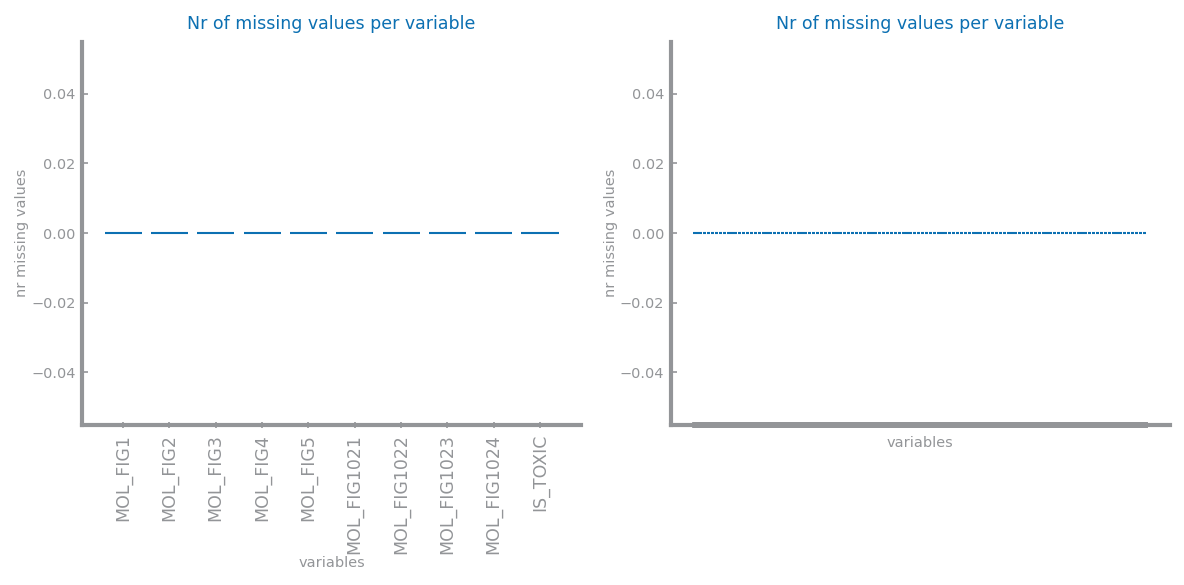

In [20]:
'''plt.figure()
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()
ds.bar_chart(mv.keys(), mv.values(), title='Nr of missing values per variable',
               xlabel='variables',
               ylabel='nr missing values', hidegrid=True)
mv.values()'''

import collections

fig, axs = plt.subplots(1, 2, figsize=(2*ds.HEIGHT, ds.HEIGHT))
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()
ds.bar_chart(mv.keys(), mv.values(), title='Nr of missing values per variable',
               xlabel='variables', ylabel='nr missing values',
               hidegrid=True, hide_xticklabels=True)

print(mv.values())

mv = list(collections.OrderedDict(mv).items())
mv_set = {}
for i in range(5):
    k, v = mv[i]
    mv_set[k] = v
for i in range(len(mv)-5, len(mv)):
    k, v = mv[i]
    mv_set[k] = v
ds.bar_chart(mv_set.keys(), mv_set.values(), ax=axs[0], title='Nr of missing values per variable',
               xlabel='variables', ylabel='nr missing values', hidegrid=True)

plt.tight_layout()

# *Data Distribution*

In [21]:
data.describe()

,MOL_FIG1,MOL_FIG2,MOL_FIG3,MOL_FIG4,MOL_FIG5,MOL_FIG6,MOL_FIG7,MOL_FIG8,MOL_FIG9,MOL_FIG10,...,MOL_FIG1015,MOL_FIG1016,MOL_FIG1017,MOL_FIG1018,MOL_FIG1019,MOL_FIG1020,MOL_FIG1021,MOL_FIG1022,MOL_FIG1023,MOL_FIG1024
count,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,...,8992.000000,8992.000000,8992.000000,8992.000000,8992.00000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000
mean,0.212967,0.035698,0.068728,0.033363,0.018683,0.144795,0.123109,0.193728,0.013790,0.017349,...,0.038923,0.061277,0.016681,0.164368,0.23899,0.022464,0.022020,0.021797,0.022353,0.018461
std,0.409427,0.185547,0.253005,0.179593,0.135411,0.351914,0.328581,0.395240,0.116625,0.130574,...,0.193423,0.239850,0.128082,0.370630,0.42649,0.148197,0.146755,0.146029,0.147838,0.134618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Boxplot A Sample Of Numeric Variables

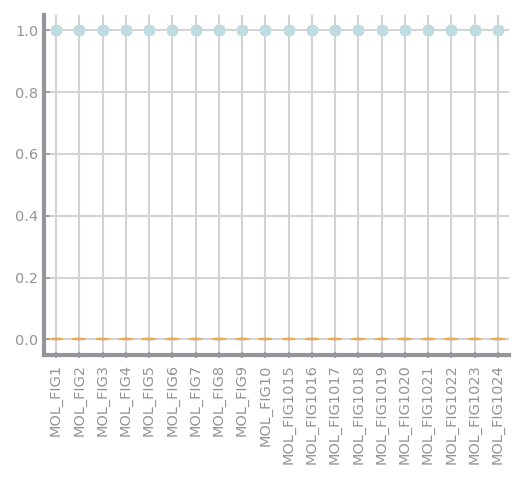

In [22]:
for i in range(11,1015):
    data = data.drop('MOL_FIG'+ str(i), 1)
    
data.boxplot(rot=90)
plt.show()

## Boxplot For Each Sampled Variable

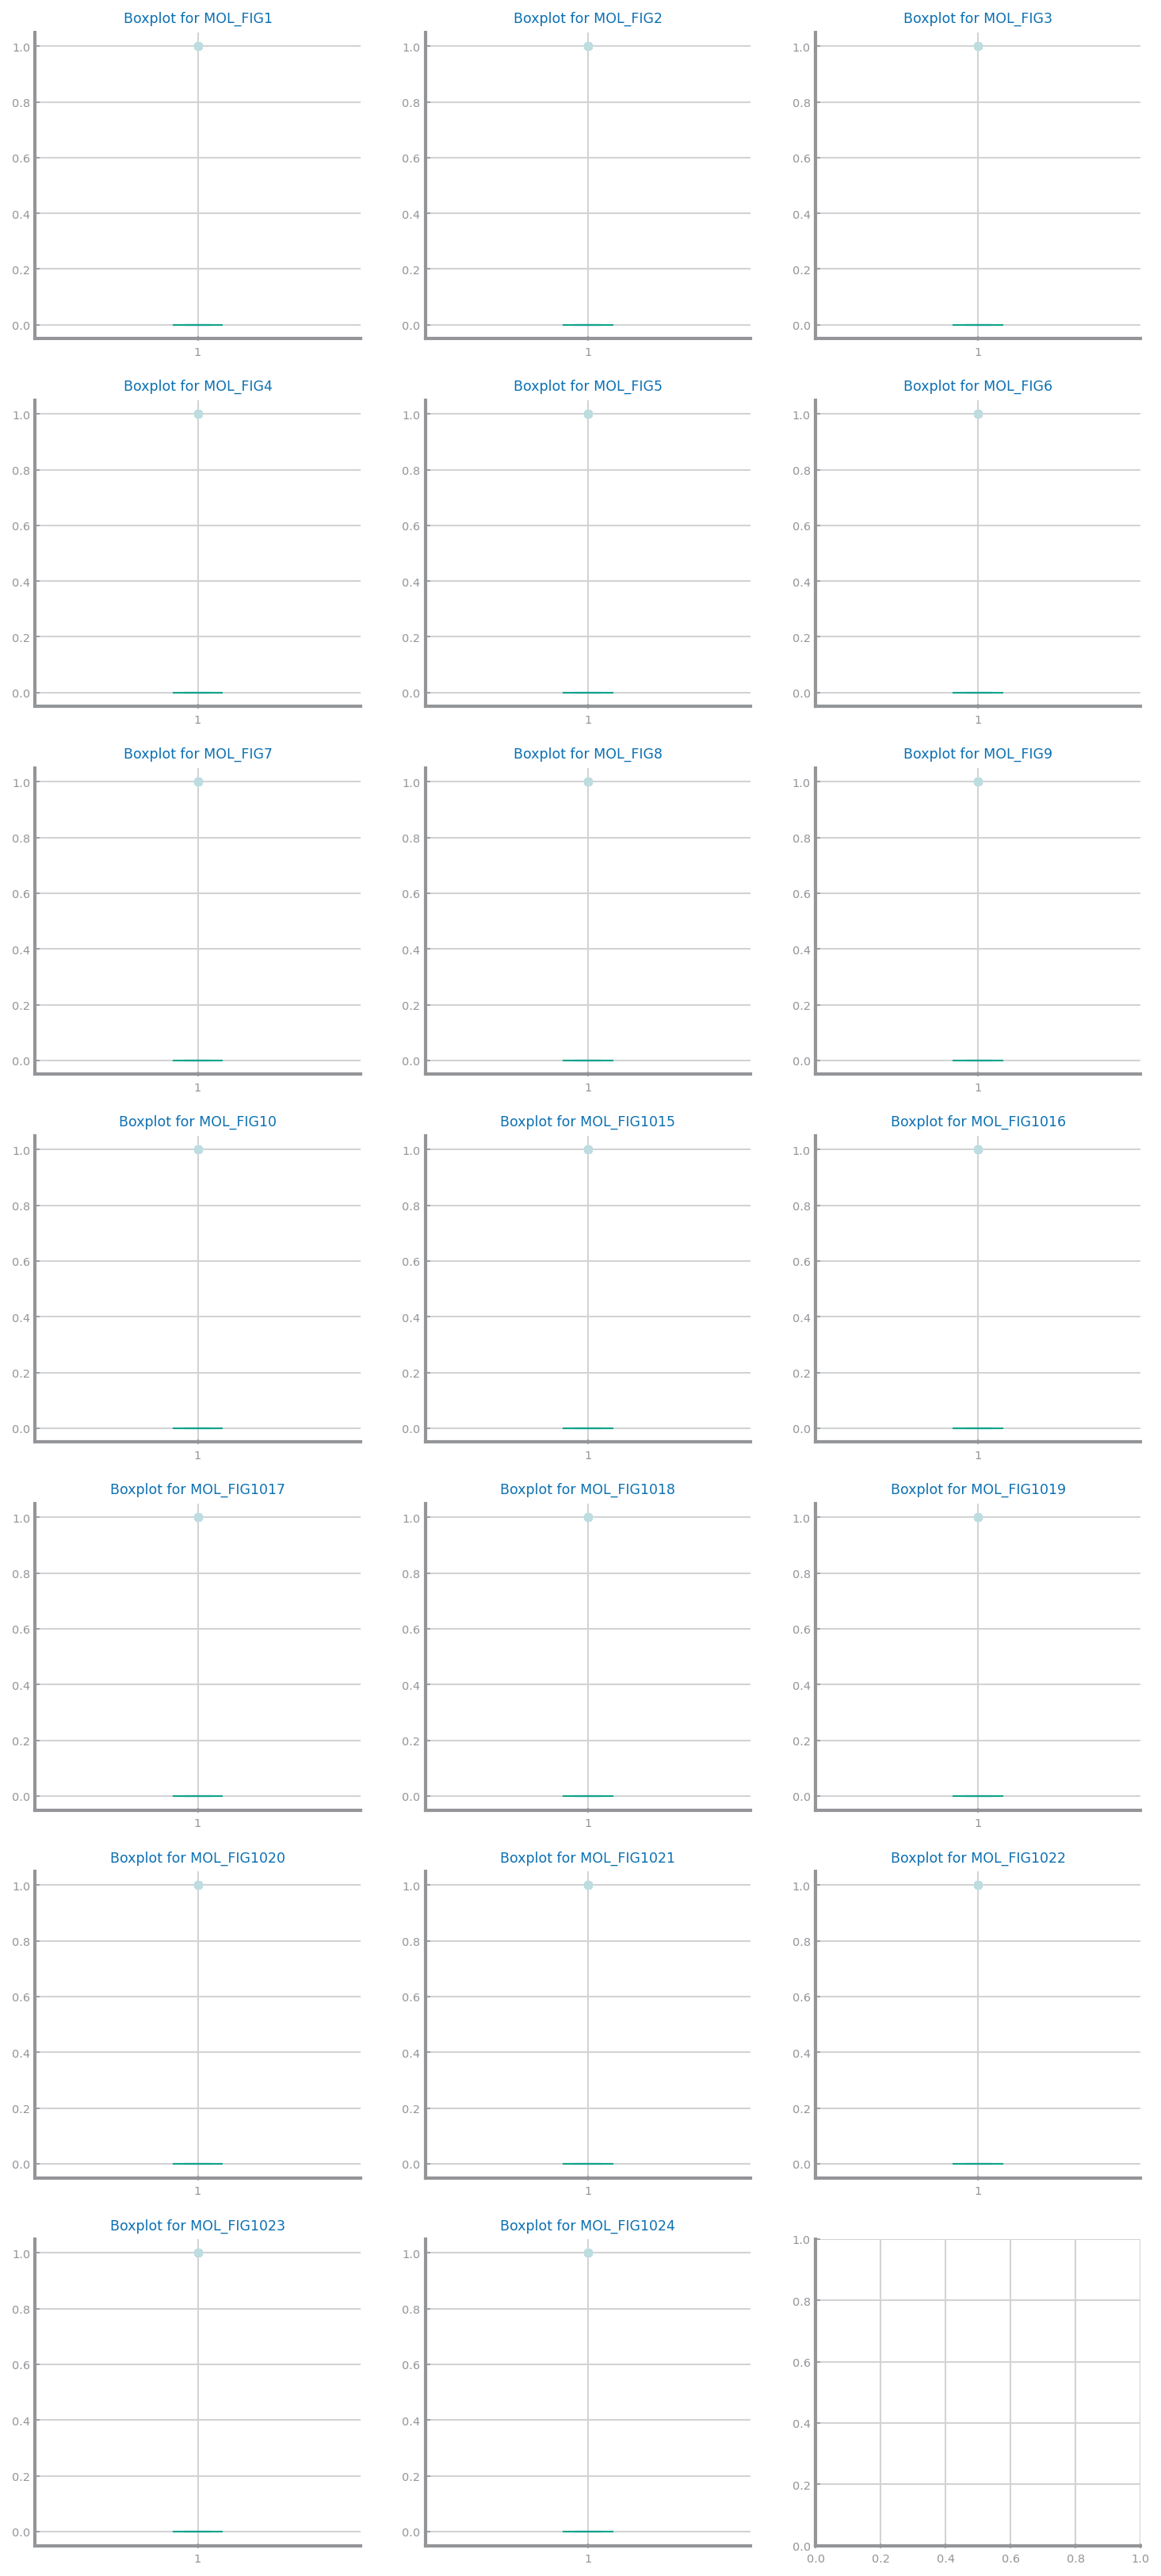

In [23]:
numeric_vars = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(len(numeric_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

## Histogram For Each Sampled Numeric Variable

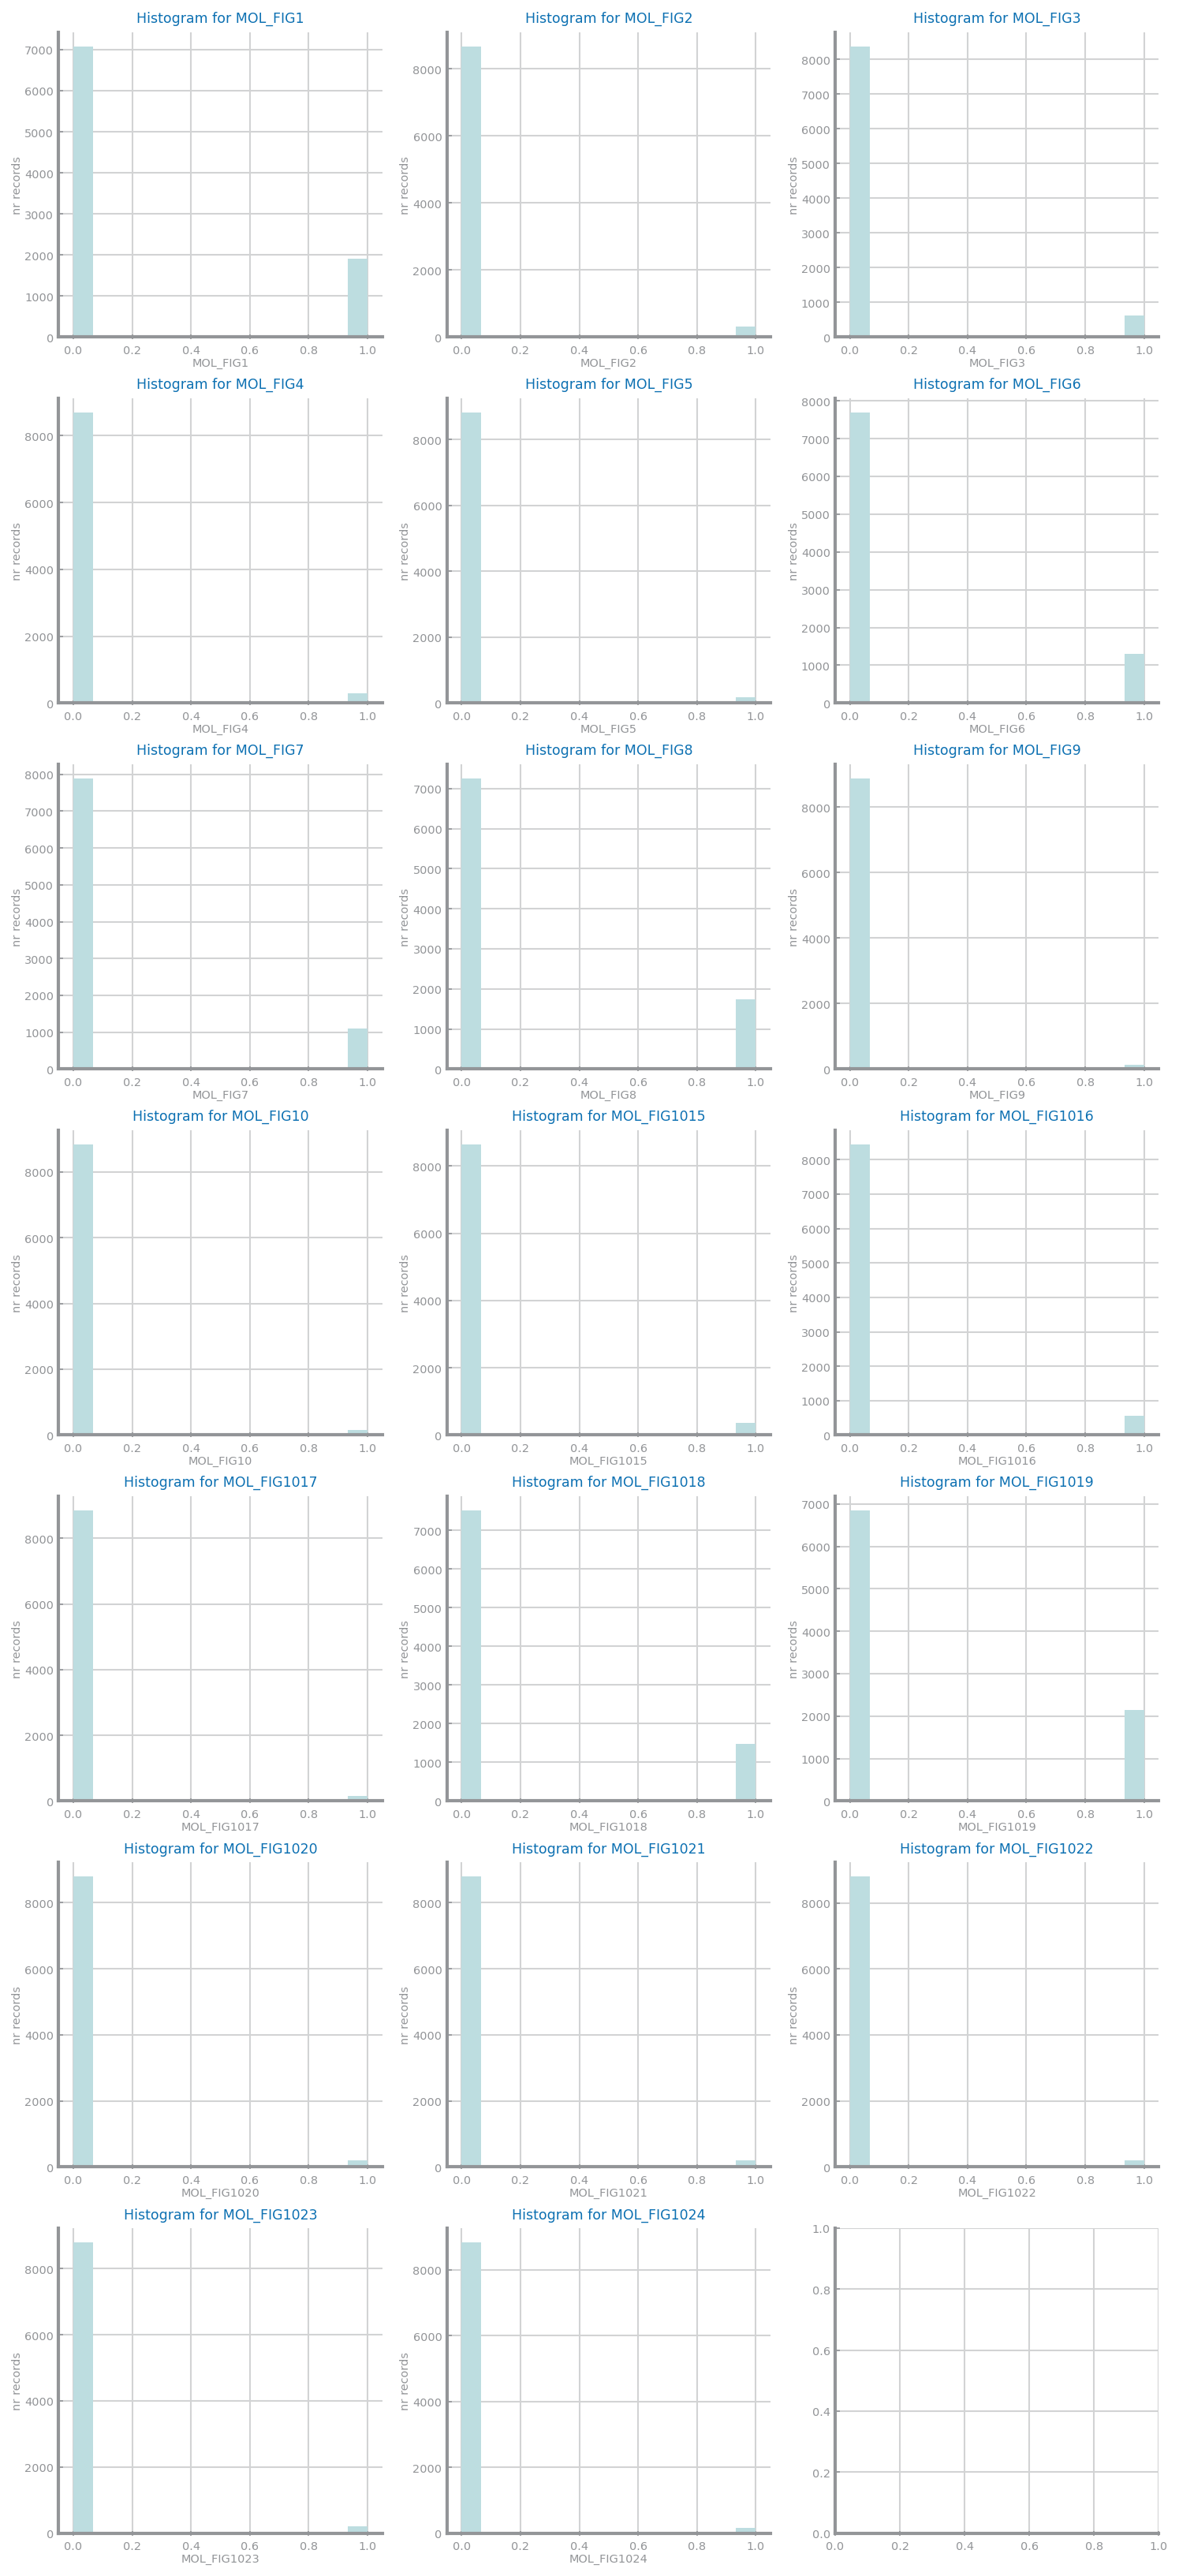

In [24]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram for %s'%numeric_vars[n])
    axs[i, j].set_xlabel(numeric_vars[n])
    axs[i, j].set_ylabel("nr records")
    axs[i, j].hist(data[numeric_vars[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

## Best Fit For Each Sampled Numeric Variable

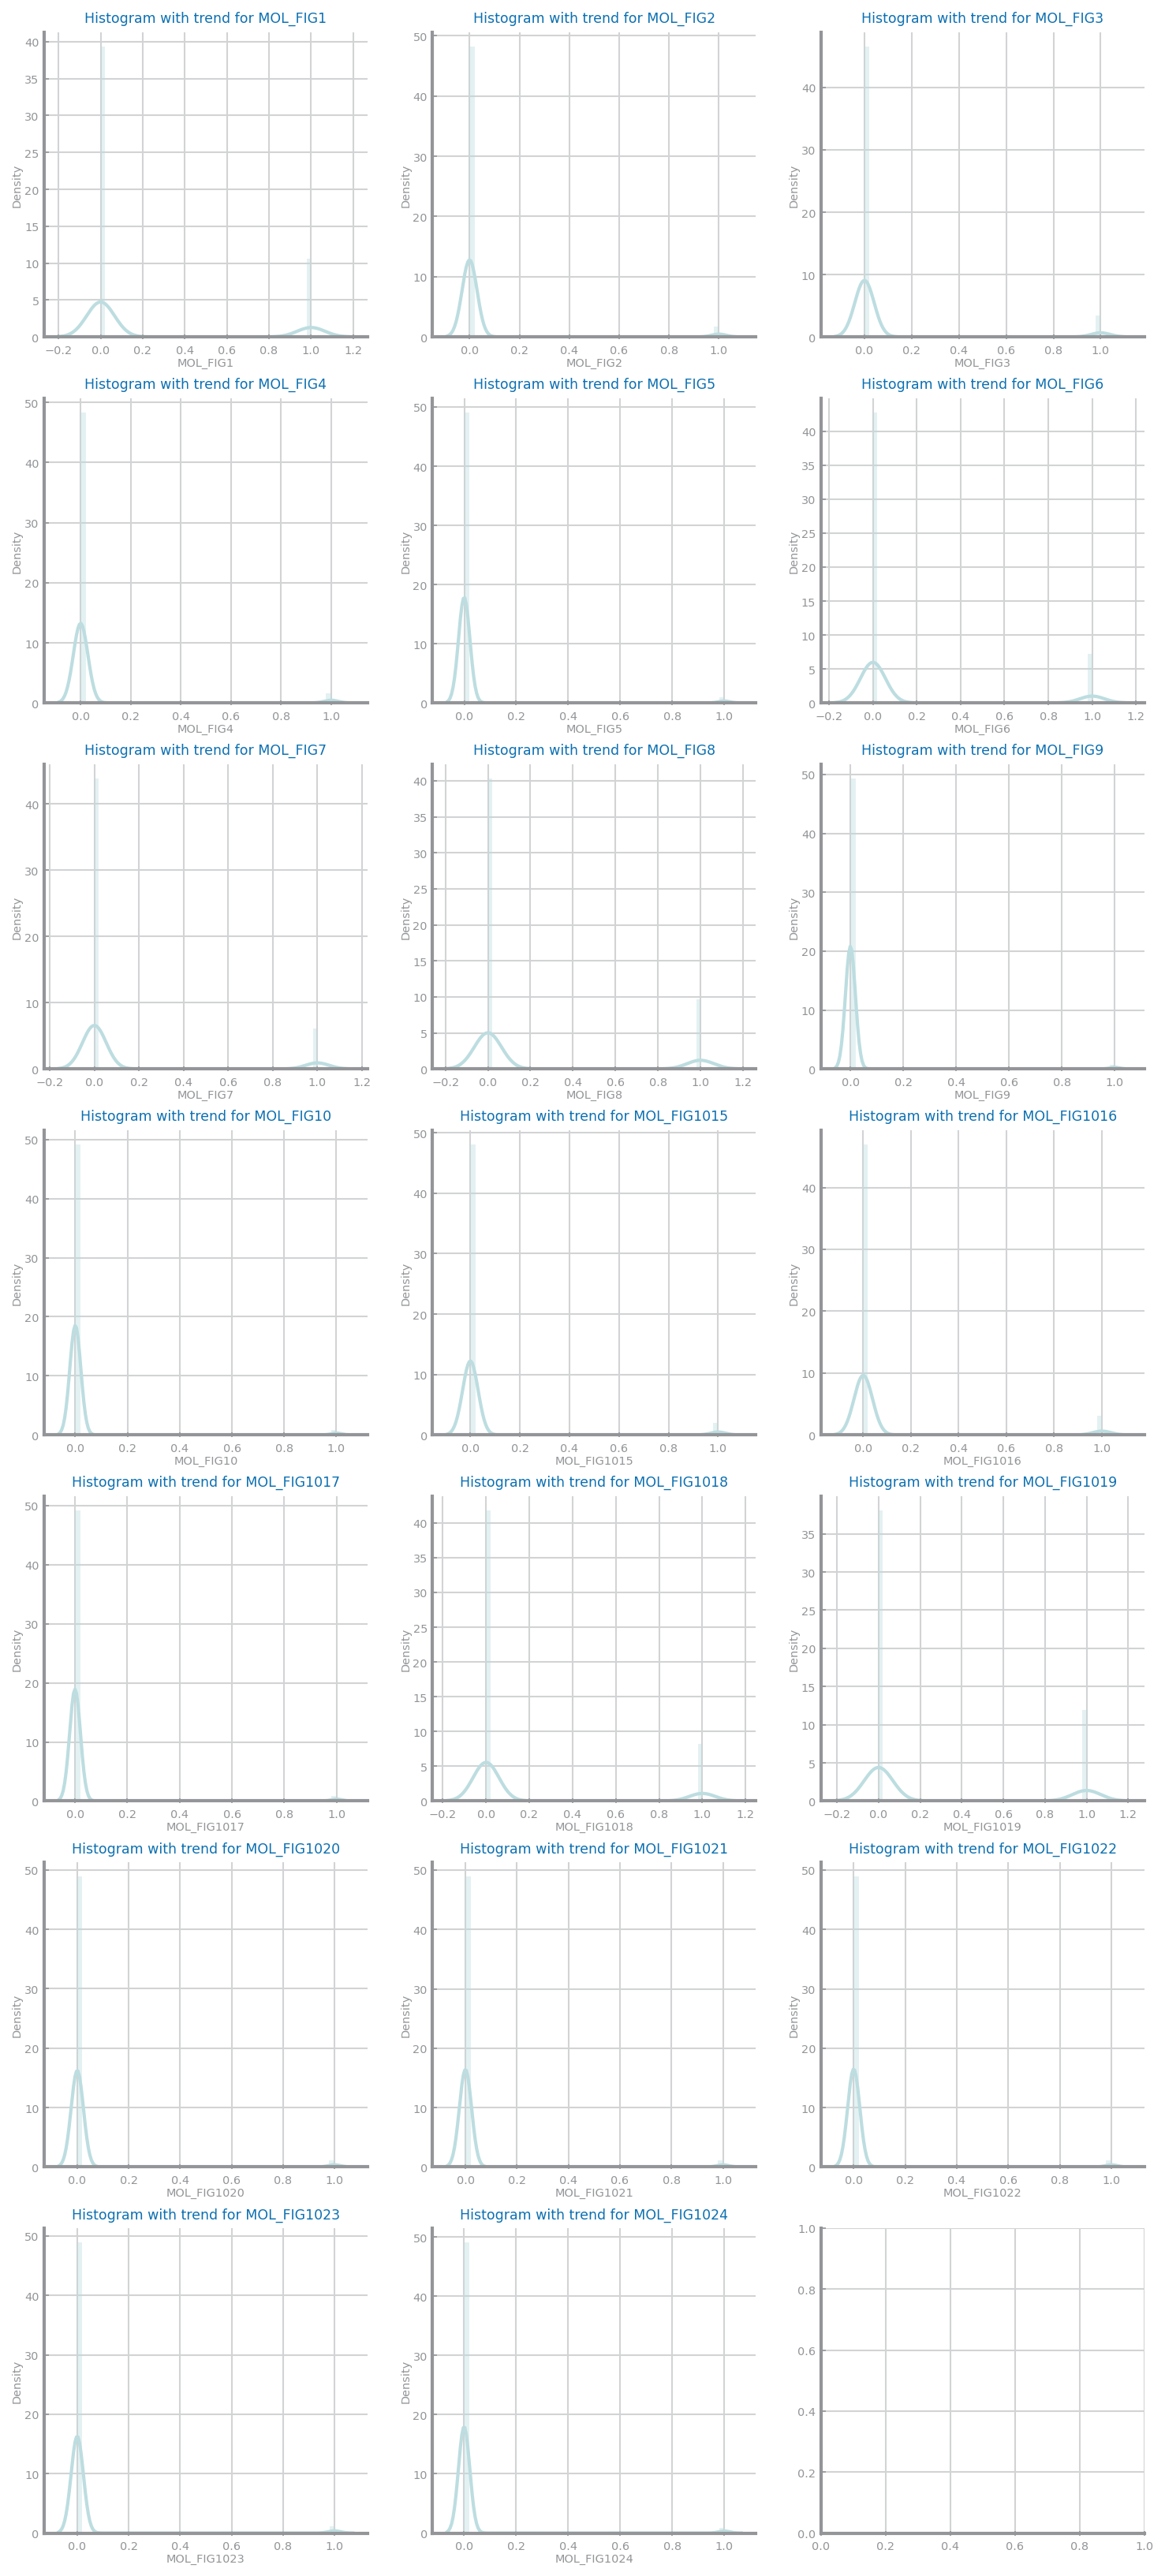

In [25]:
import seaborn as sns
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram with trend for %s'%numeric_vars[n])
    sns.distplot(data[numeric_vars[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

## Distributions For Each Sampled Numeric Variable

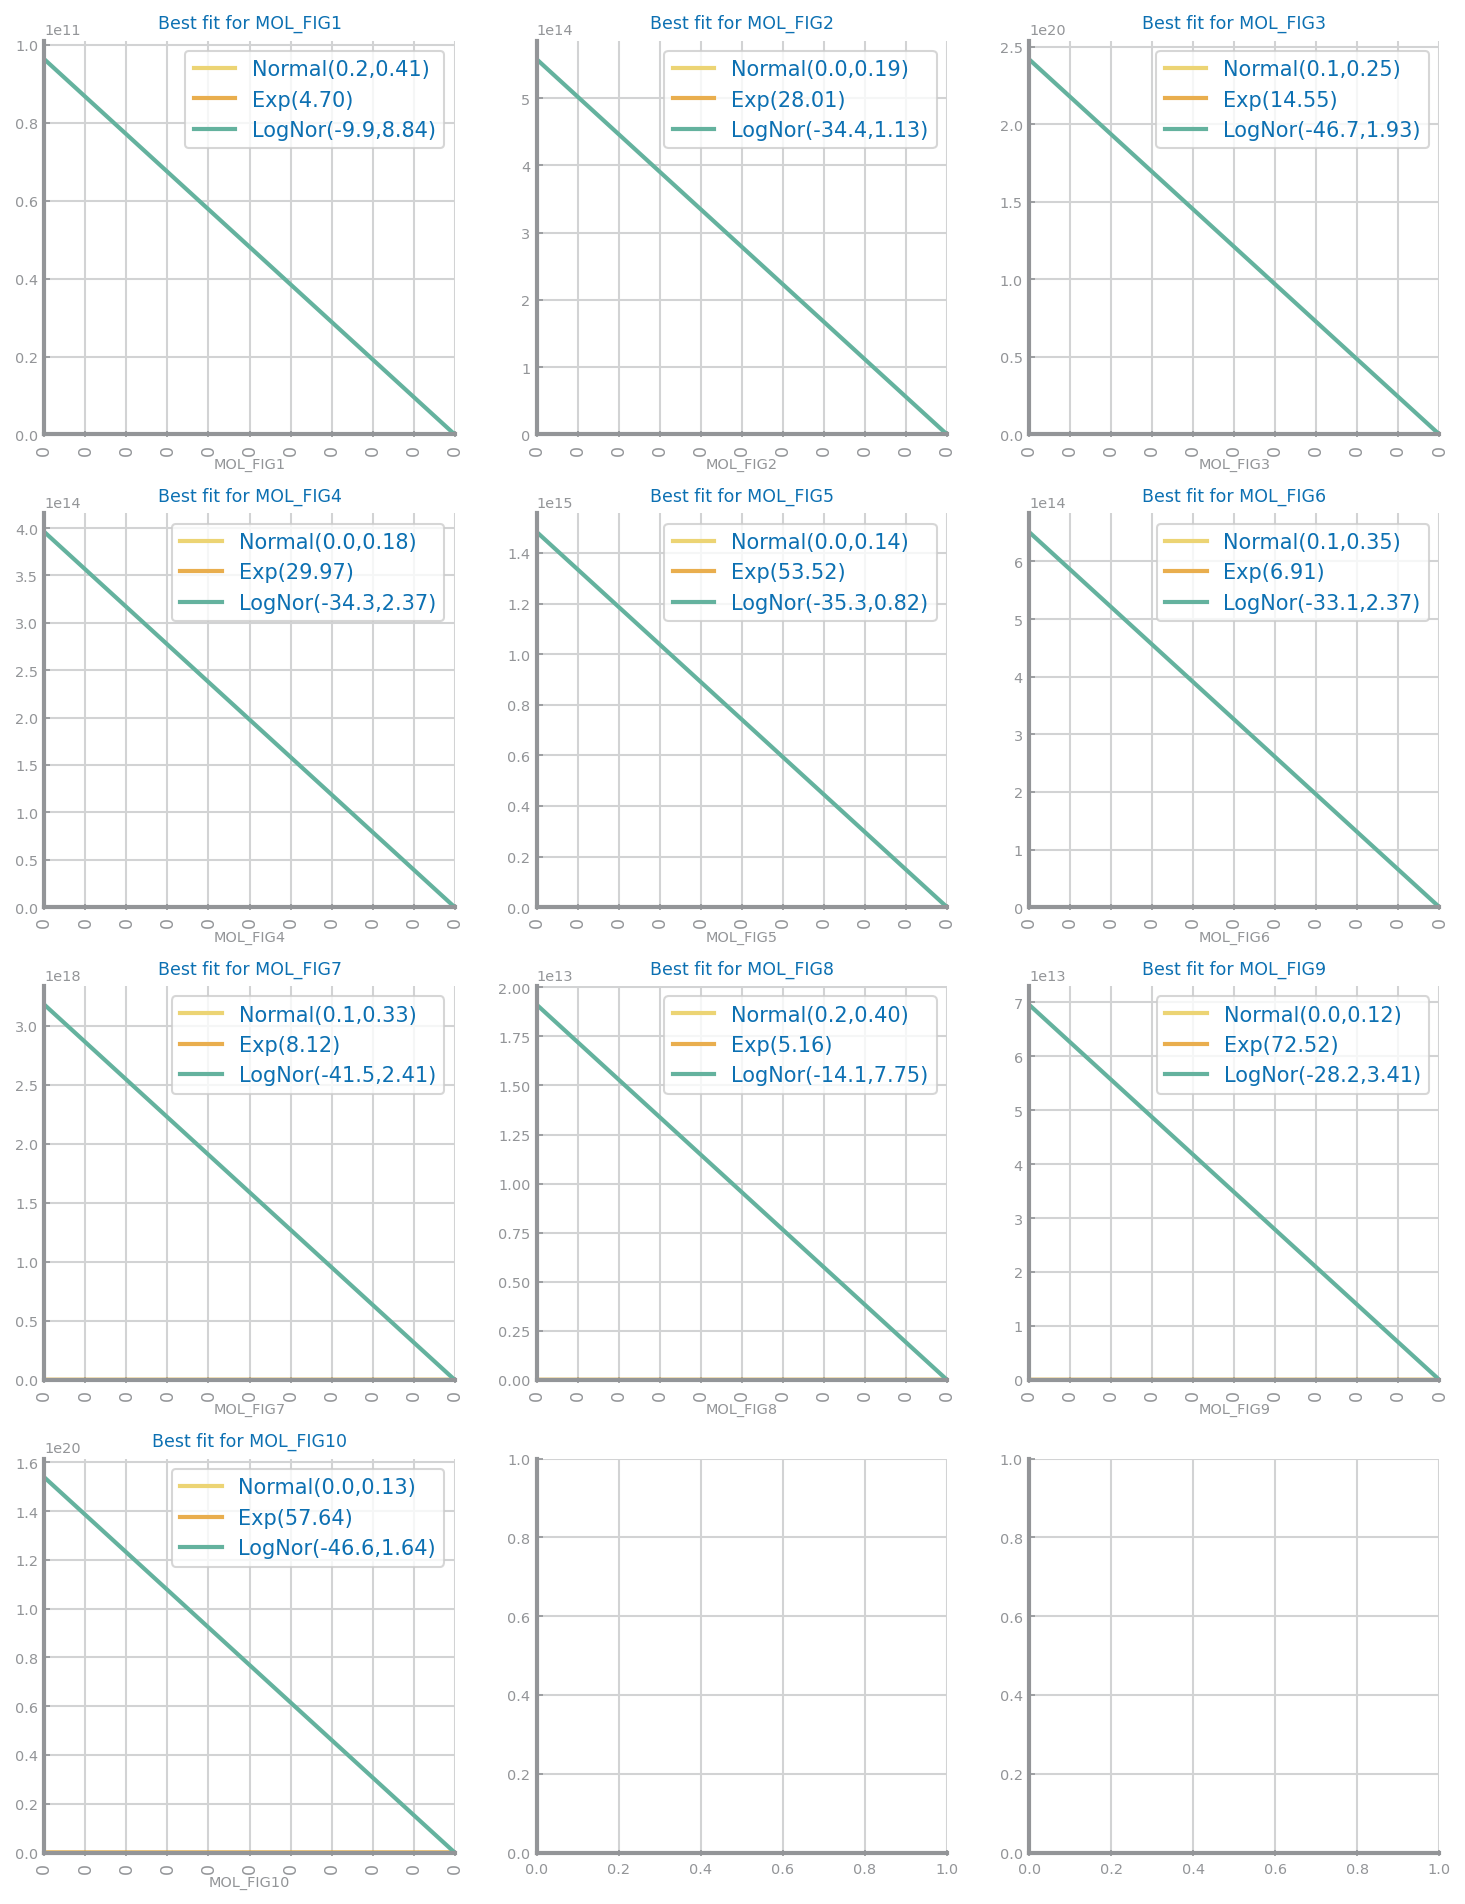

In [26]:
def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = _stats.lognorm.fit(x_values)
    distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    ax.hist(values, 20, density=True)
    distributions = compute_known_distributions(values)
    ds.multiple_line_chart(values, distributions, ax=ax, title='Best fit for %s'%var, xlabel=var, ylabel='')

curr_rows = 4
fig, axs = plt.subplots(curr_rows, cols, figsize=(cols*ds.HEIGHT, curr_rows*ds.HEIGHT))
i, j = 0, 0
for n in range(0, 10):
    histogram_with_distributions(axs[i, j], data[numeric_vars[n]].dropna(), numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

## Description of Symbolic Variable (Target Variable)

In [27]:
data.describe(include='category')

,IS_TOXIC
count,8992
unique,2
top,negative
freq,8251


## Possible Values For Symbolic Variable (Target Variable)

In [28]:
symbolic_vars = data.select_dtypes(include='category').columns
for v in symbolic_vars:
    print(v, data[v].unique())

IS_TOXIC ['negative', 'positive']
Categories (2, object): ['negative', 'positive']


## Histogram For Symbolic Variable (Target Variable)

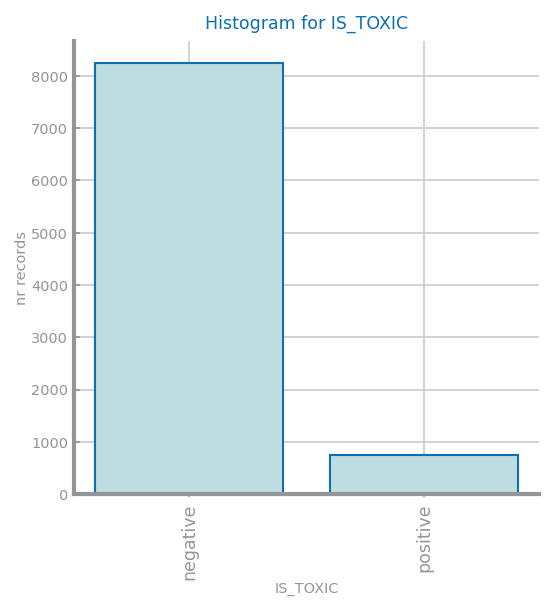

In [29]:
rows, cols = ds.choose_grid(len(symbolic_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(symbolic_vars)):
    counts = data[symbolic_vars[n]].value_counts()
    ds.bar_chart(counts.index.to_list(), counts.values, ax=axs[i, j], title='Histogram for %s'%symbolic_vars[n],
                 xlabel=symbolic_vars[n], ylabel='nr records')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

# *Data Granularity*

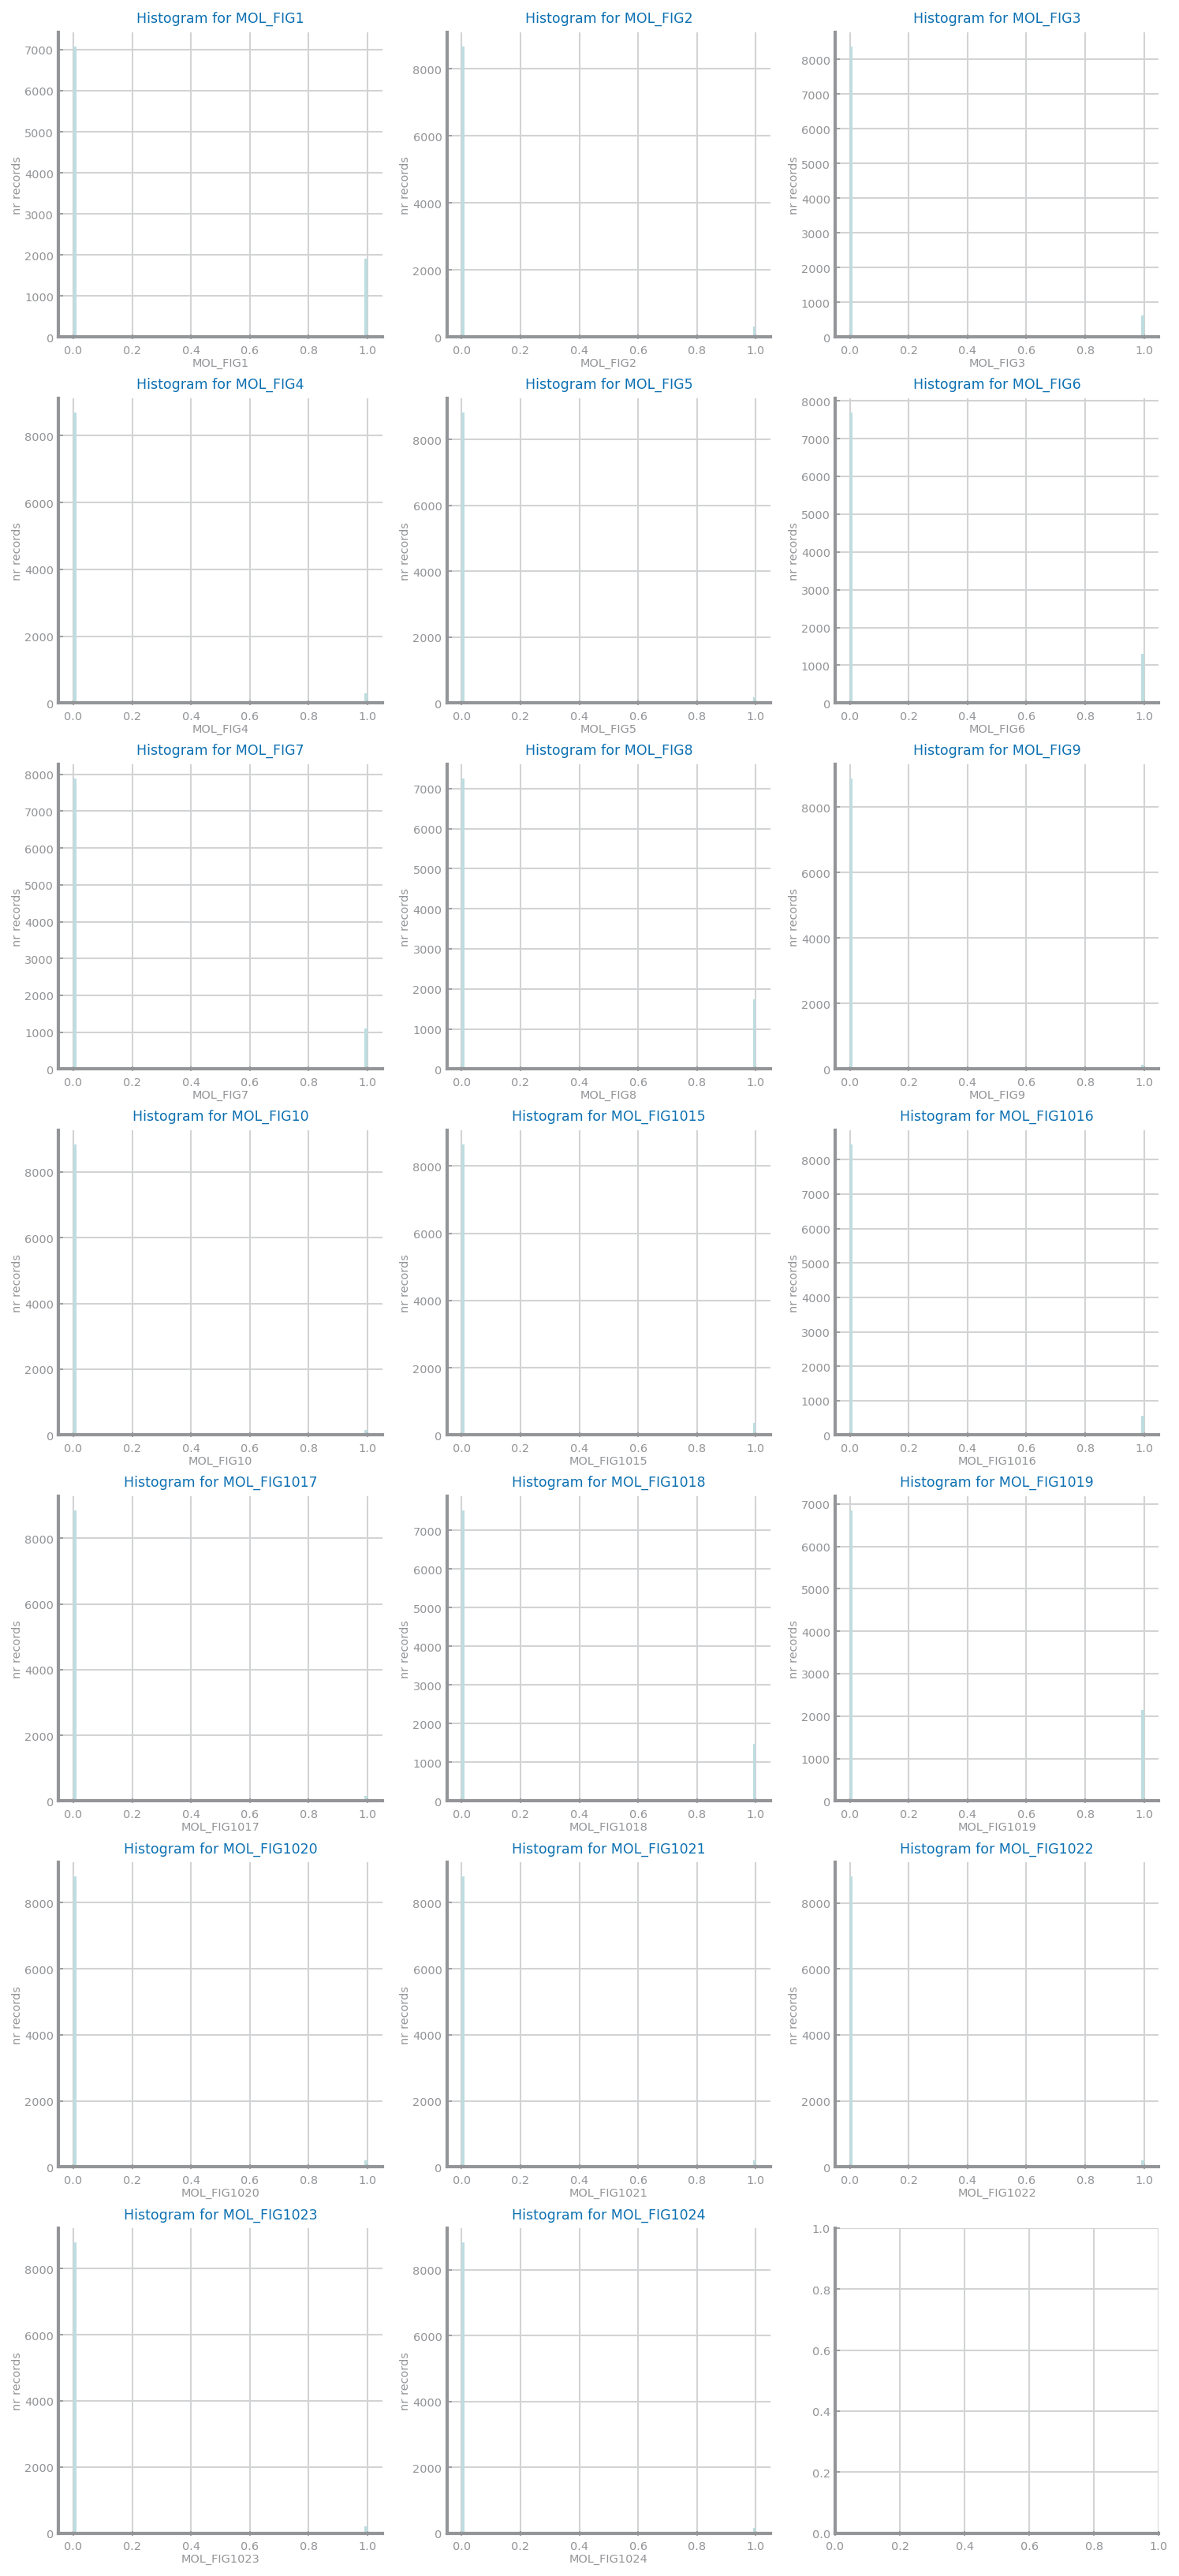

In [30]:
variables = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(len(variables))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%variables[n])
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data[variables[n]].values, bins=100)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

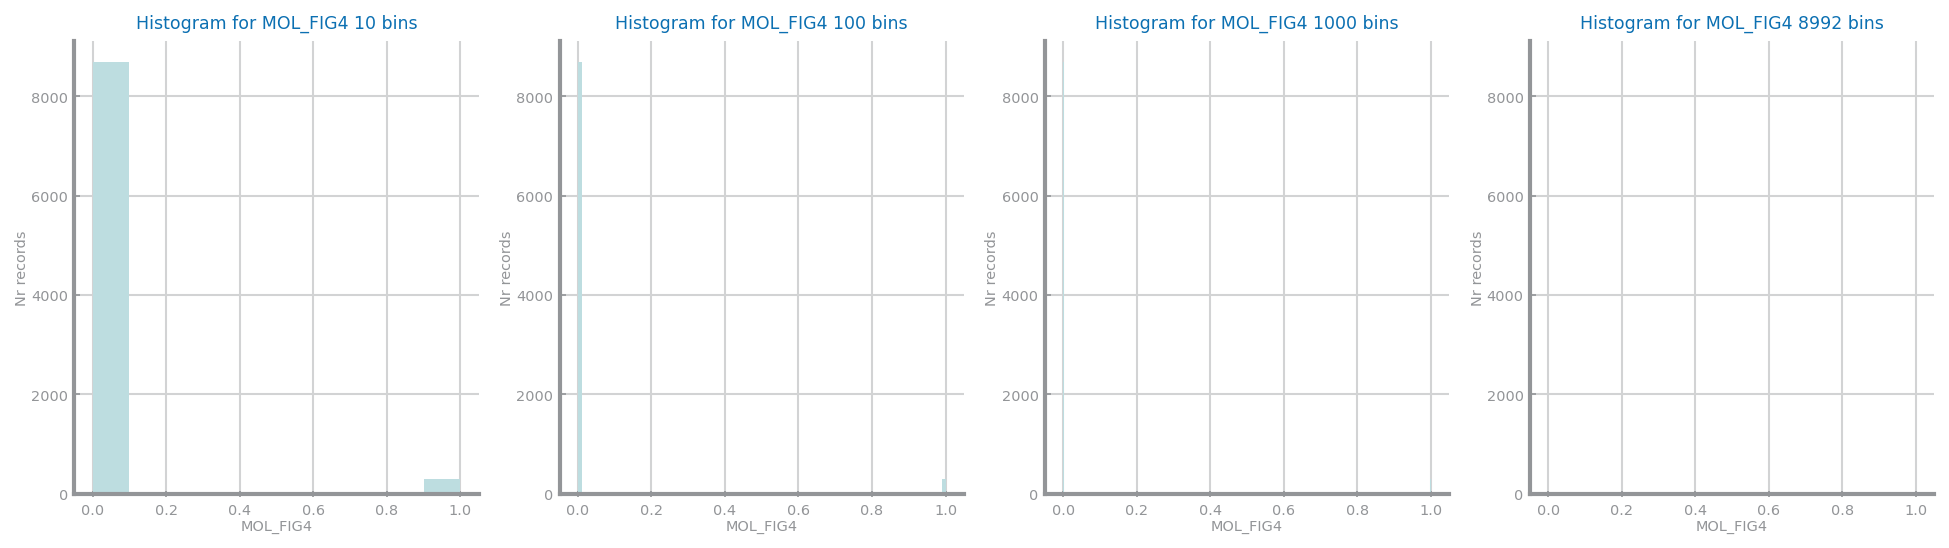

In [31]:
bins = (10, 100, 1000, data.shape[0])
fig, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ds.HEIGHT, ds.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for %s %d bins'%('MOL_FIG4', bins[j]))
    axs[j].set_xlabel('MOL_FIG4')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(data['MOL_FIG4'].values, bins=bins[j])
plt.show()

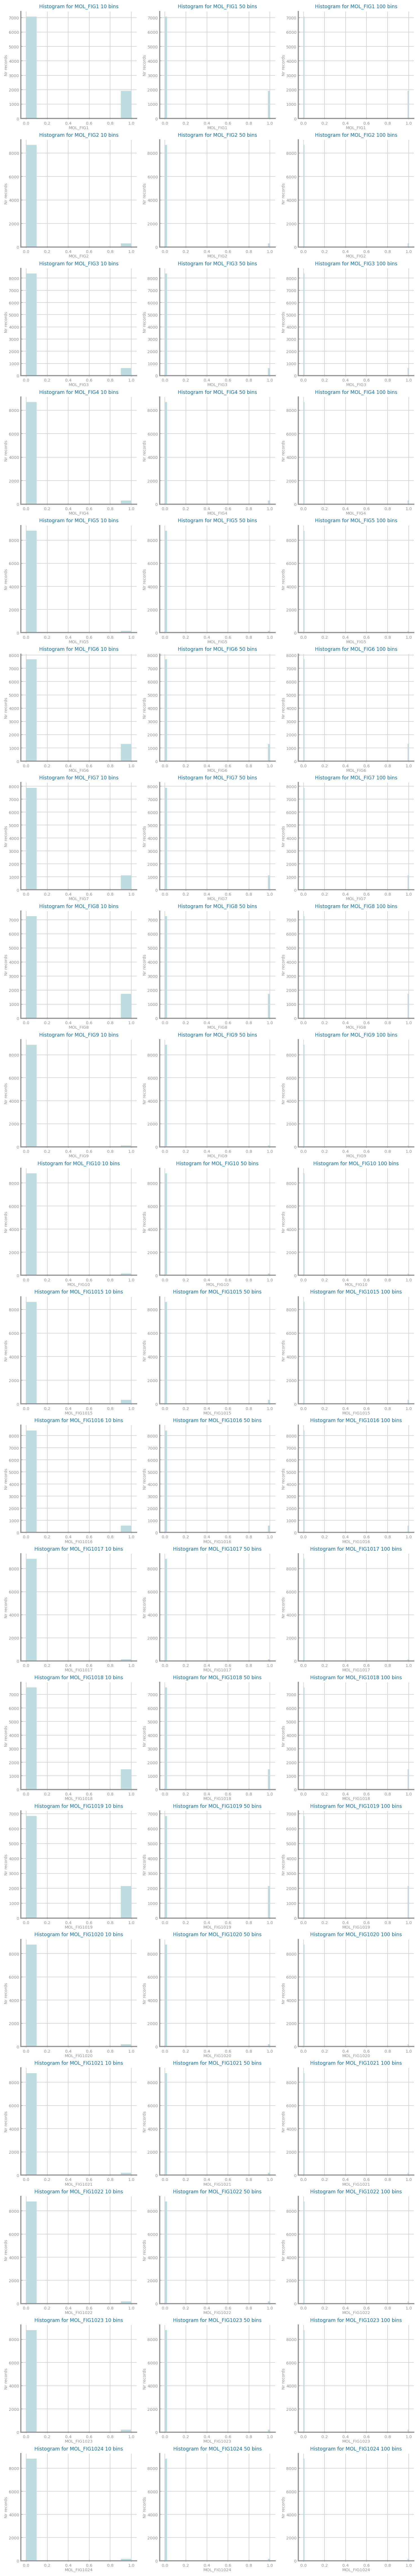

In [32]:
columns = data.select_dtypes(include='number').columns
rows = len(columns)
bins = (10, 50, 100)
cols = len(bins)
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins'%(columns[i], bins[j]))
        axs[i, j].set_xlabel(columns[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(data[columns[i]].values, bins=bins[j])
plt.show()